<div style="text-align:center; color:Darkblue; font-size:48px; font-family: 'CustomFont'; line-height: 1.2;"><b>Data Science Project Report</b></div>



<div style="text-align:Left; color:blue; font-size:30px; line-height: 1.2;font-family: 'CustomFont'"><b>Project Title: Supply Chain Optimization for FMCG Company</b></div>


 <div style="text-align:Left; color:blue; font-size:25px; line-height: 1.2;font-family: 'CustomFont'"><b>
    Executive Summary
    </b></div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
In this report, we present the results of a data science project aimed at optimizing the supply chain for a Fast Moving Consumer Goods (FMCG) company in the instant noodles business. The company has identified a mismatch between demand and supply, leading to inventory cost and overall losses. The goal of this project is to build a predictive model to determine the optimum product weight to be shipped from each warehouse, thereby reducing inventory costs and improving profitability.
</div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Table of Contents<b>
    
1. Introduction
2. Data Preparation
3. Exploratory Data Analysis (EDA)
4. Model Selection and Training
5. Model Interpretation
6. Next Steps and Improvements
7. Conclusion

</div>


 <div style="text-align:Left; color:blue; font-size:25px; line-height: 1.2;font-family: 'CustomFont'"><b>
    Introduction
    </b></div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Project Overview<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
The project focuses on optimizing the supply chain for a FMCG company that recently entered the instant noodles business. The company faces a challenge of demand-supply mismatch, leading to increased inventory costs and financial losses. The objective is to build a predictive model that can determine the optimal product weight to be shipped from each warehouse in the country.
    </div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
<b>Goals and Objectives<b>
    </div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">

The primary goals of this project are as follows:
1. Build a predictive model using historical data to optimize product weight shipments.
2. Perform thorough data preprocessing, exploratory data analysis (EDA), and feature engineering.
3. Select and train multiple machine learning algorithms.
4. Evaluate model performance using appropriate metrics.
5. Interpret feature importance to gain insights into the supply chain dynamics.
    </div>

<div style="text-align:Left; color:blue; font-size:25px; line-height: 1.2;font-family: 'CustomFont'"><b>
    Data Preparation
    </b></div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Data Loading<b>
</div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    The project started by loading the train and test datasets, containing information about warehouse, regional, and supply chain factors. These datasets were used to train and test the predictive models.
    </div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the train and test datasets
train_data = pd.read_csv(r'E:\INTERNSHIP\supply_train.csv')
test_data = pd.read_csv(r'E:\INTERNSHIP\supply_test.csv')

In [3]:
train_data

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0               0     WH_100000     EID_50000         Urban            Small   
1               1     WH_100001     EID_50001         Rural            Large   
2               2     WH_100002     EID_50002         Rural              Mid   
3               3     WH_100003     EID_50003         Rural              Mid   
4               4     WH_100004     EID_50004         Rural            Large   
...           ...           ...           ...           ...              ...   
16615       16615     WH_116615     EID_66615         Urban            Large   
16616       16616     WH_116616     EID_66616         Urban            Large   
16617       16617     WH_116617     EID_66617         Rural            Large   
16618       16618     WH_116618     EID_66618         Rural            Small   
16619       16619     WH_116619     EID_66619         Rural            Large   

        zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0       West           Zone 6                   3                    1   
1      North           Zone 5                   0                    0   
2      South           Zone 2                   1                    0   
3      North           Zone 3                   7                    4   
4      North           Zone 5                   3                    1   
...      ...              ...                 ...                  ...   
16615   West           Zone 6                   3                    1   
16616  North           Zone 5                   2                    0   
16617  North           Zone 6                   5                    0   
16618   West           Zone 6                   3                    2   
16619   West           Zone 5                   4                    0   

       Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                      2  ...                1            91         29.0   
1                      4  ...                1           210         31.0   
2                      4  ...                0           161         37.0   
3                      2  ...                0           103         21.0   
4                      2  ...                1           112         25.0   
...                  ...  ...              ...           ...          ...   
16615                  6  ...                0           240         19.0   
16616                  2  ...                1           164         30.0   
16617                  4  ...                1           211         24.0   
16618                  3  ...                1           119          NaN   
16619                  6  ...                1           261         34.0   

       wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0              NaN                          13              0   
1              NaN                           4              0   
2              NaN                          17              0   
3              NaN                          17              1   
4           2009.0                          18              0   
...            ...                         ...            ...   
16615       2009.0                          14              0   
16616          NaN                          17              0   
16617       2003.0                          24              1   
16618       2007.0                          16              0   
16619       2001.0                          32              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                 A                 5              15   
1                                 A                 3              17   
2                                 A                 6              22   
3                                A+                 3              27   
4                                 C                 6              24   
...          

In [4]:
test_data

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0          16621     WH_116621     EID_66621         Rural            Large   
1          16622     WH_116622     EID_66622         Rural            Large   
2          16623     WH_116623     EID_66623         Rural            Small   
3          16624     WH_116624     EID_66624         Rural              Mid   
4          16625     WH_116625     EID_66625         Urban              Mid   
...          ...           ...           ...           ...              ...   
5524       22145     WH_122145     EID_72145         Rural            Large   
5525       22146     WH_122146     EID_72146         Rural            Small   
5526       22147     WH_122147     EID_72147         Rural            Large   
5527       22148     WH_122148     EID_72148         Rural            Large   
5528       22149     WH_122149     EID_72149         Rural              Mid   

       zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0     North           Zone 5                   5                    0   
1     North           Zone 5                   5                    0   
2     North           Zone 6                   3                    0   
3      West           Zone 4                   5                    2   
4     North           Zone 4                   6                    0   
...     ...              ...                 ...                  ...   
5524  North           Zone 6                   8                    1   
5525  South           Zone 6                   3                    1   
5526  North           Zone 6                   7                    2   
5527  North           Zone 6                   6                    2   
5528   East           Zone 4                   7                    2   

      Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                     3  ...                0           156         30.0   
1                     2  ...                1            79         31.0   
2                     3  ...                1            70         41.0   
3                     2  ...                1           255         33.0   
4                     4  ...                0           205         20.0   
...                 ...  ...              ...           ...          ...   
5524                  3  ...                1           203         28.0   
5525                  3  ...                0           170          NaN   
5526                  2  ...                0            99         22.0   
5527                  4  ...                0           220         17.0   
5528                  9  ...                1           104         36.0   

      wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          2006.0                          24              0   
1          2019.0                           5              1   
2          2008.0                          19              1   
3          2017.0                           9              1   
4          1999.0                          25              0   
...           ...                         ...            ...   
5524       2007.0                          22              1   
5525          NaN                          26              0   
5526          NaN                          20              0   
5527          NaN                          13              0   
5528          NaN                          11              0   

      approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                                A                 2               5   
1                                C                 2              24   
2                               A+                 5               9   
3                               A+                 3              11   
4                                B                 4              26   
...                            ...               ...             .

In [5]:
# Check the first few rows of the train dataset to understand the data
train_data.head()

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0           0     WH_100000     EID_50000         Urban            Small   
1           1     WH_100001     EID_50001         Rural            Large   
2           2     WH_100002     EID_50002         Rural              Mid   
3           3     WH_100003     EID_50003         Rural              Mid   
4           4     WH_100004     EID_50004         Rural            Large   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0   West           Zone 6                   3                    1   
1  North           Zone 5                   0                    0   
2  South           Zone 2                   1                    0   
3  North           Zone 3                   7                    4   
4  North           Zone 5                   3                    1   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  2  ...                1            91         29.0   
1                  4  ...                1           210         31.0   
2                  4  ...                0           161         37.0   
3                  2  ...                0           103         21.0   
4                  2  ...                1           112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 25 columns]

In [6]:
# Check the first few rows of the test dataset
test_data.head()

Unnamed: 0 Ware_house_ID WH_Manager_ID Location_type WH_capacity_size  \
0       16621     WH_116621     EID_66621         Rural            Large   
1       16622     WH_116622     EID_66622         Rural            Large   
2       16623     WH_116623     EID_66623         Rural            Small   
3       16624     WH_116624     EID_66624         Rural              Mid   
4       16625     WH_116625     EID_66625         Urban              Mid   

    zone WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0  North           Zone 5                   5                    0   
1  North           Zone 5                   5                    0   
2  North           Zone 6                   3                    0   
3   West           Zone 4                   5                    2   
4  North           Zone 4                   6                    0   

   Competitor_in_mkt  ...  electric_supply dist_from_hub  workers_num  \
0                  3  ...                0           156         30.0   
1                  2  ...                1            79         31.0   
2                  3  ...                1            70         41.0   
3                  2  ...                1           255         33.0   
4                  4  ...                0           205         20.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0       2006.0                          24              0   
1       2019.0                           5              1   
2       2008.0                          19              1   
3       2017.0                           9              1   
4       1999.0                          25              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 2               5   
1                             C                 2              24   
2                            A+                 5               9   
3                            A+                 3              11   
4                             B                 4              26   

   product_wg_ton  
0           30132  
1            6075  
2           24076  
3           13092  
4           29071  

[5 rows x 25 columns]

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Handling Missing Values<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
Missing values were identified and handled appropriately. Numerical features were imputed with the median, while categorical features were filled with default categories or modes.
     </div>

In [7]:
# Check for missing values
train_data.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [8]:
test_data.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [9]:
# Filling missing values with the median
train_data['workers_num'].fillna(train_data['workers_num'].median(), inplace=True)
test_data['workers_num'].fillna(test_data['workers_num'].median(), inplace=True)

In [10]:
# Filling missing values with the median or mode
train_data['wh_est_year'].fillna(train_data['wh_est_year'].median(), inplace=True)
test_data['wh_est_year'].fillna(test_data['wh_est_year'].median(), inplace=True)

In [11]:
# Filling missing values with a default category or mode
train_data['approved_wh_govt_certificate'].fillna('NIL', inplace=True)  
test_data['approved_wh_govt_certificate'].fillna('NIL', inplace=True)  

In [12]:
# Check for missing values
train_data.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [13]:
test_data.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Encoding Categorical Variables<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
Categorical variables were encoded using one-hot encoding to make them suitable for machine learning models.
 </div>

In [14]:
# Encode categorical variables (One-Hot Encoding)
train_data = pd.get_dummies(train_data, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 
                                                 'approved_wh_govt_certificate'])
test_data = pd.get_dummies(test_data, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 
                                               'approved_wh_govt_certificate'])

In [15]:
train_data

Unnamed: 0 Ware_house_ID WH_Manager_ID WH_capacity_size  \
0               0     WH_100000     EID_50000            Small   
1               1     WH_100001     EID_50001            Large   
2               2     WH_100002     EID_50002              Mid   
3               3     WH_100003     EID_50003              Mid   
4               4     WH_100004     EID_50004            Large   
...           ...           ...           ...              ...   
16615       16615     WH_116615     EID_66615            Large   
16616       16616     WH_116616     EID_66616            Large   
16617       16617     WH_116617     EID_66617            Large   
16618       16618     WH_116618     EID_66618            Small   
16619       16619     WH_116619     EID_66619            Large   

       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
16615                   3                    1                  6   
16616                   2                    0                  2   
16617                   5                    0                  4   
16618                   3                    2                  3   
16619                   4                    0                  6   

       retail_shop_num  distributor_num  flood_impacted  ...  \
0                 4651               24               0  ...   
1                 6217               47               0  ...   
2                 4306               64               0  ...   
3                 6000               50               0  ...   
4                 4740               42               1  ...   
...                ...              ...             ...  ...   
16615             4779               70               0  ...   
16616             5718               26               0  ...   
16617             4514               50               1  ...   
16618             5829               59               1  ...   
16619             3751               49               0  ...   

       WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                        False                     True   
1                         True                    False   
2                        False                    False   
3                        False                    False   
4                         True                    False   
...                        ...                      ...   
16615                    False                     True   
16616                     True                    False   
16617                    False                     True   
16618                    False                     True   
16619                     True                    False   

       wh_owner_type_Company Owned  wh_owner_type_Rented  \
0                            False                  True   
1                             True                 False   
2                             True                 False   
3                            False                  True   
4                             True                 False   
...                            ...                   ...   
16615                        False                  True   
16616                         True                 False   
16617                         True                 False   
16618                        False                  True   
16619                        False                  True   

       approved_wh_govt_certificate_A  approved_wh_govt_certificate_A+  \
0                                True                            False   
1                                True 

In [16]:
test_data

Unnamed: 0 Ware_house_ID WH_Manager_ID WH_capacity_size  \
0          16621     WH_116621     EID_66621            Large   
1          16622     WH_116622     EID_66622            Large   
2          16623     WH_116623     EID_66623            Small   
3          16624     WH_116624     EID_66624              Mid   
4          16625     WH_116625     EID_66625              Mid   
...          ...           ...           ...              ...   
5524       22145     WH_122145     EID_72145            Large   
5525       22146     WH_122146     EID_72146            Small   
5526       22147     WH_122147     EID_72147            Large   
5527       22148     WH_122148     EID_72148            Large   
5528       22149     WH_122149     EID_72149              Mid   

      num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                      5                    0                  3   
1                      5                    0                  2   
2                      3                    0                  3   
3                      5                    2                  2   
4                      6                    0                  4   
...                  ...                  ...                ...   
5524                   8                    1                  3   
5525                   3                    1                  3   
5526                   7                    2                  2   
5527                   6                    2                  4   
5528                   7                    2                  9   

      retail_shop_num  distributor_num  flood_impacted  ...  \
0                5590               15               0  ...   
1                5856               40               0  ...   
2                4803               40               0  ...   
3                4784               15               0  ...   
4                3699               24               0  ...   
...               ...              ...             ...  ...   
5524             5030               46               0  ...   
5525             4320               60               0  ...   
5526             5268               64               0  ...   
5527             4378               32               0  ...   
5528             3626               50               1  ...   

      WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                        True                    False   
1                        True                    False   
2                       False                     True   
3                       False                    False   
4                       False                    False   
...                       ...                      ...   
5524                    False                     True   
5525                    False                     True   
5526                    False                     True   
5527                    False                     True   
5528                    False                    False   

      wh_owner_type_Company Owned  wh_owner_type_Rented  \
0                            True                 False   
1                            True                 False   
2                           False                  True   
3                           False                  True   
4                           False                  True   
...                           ...                   ...   
5524                        False                  True   
5525                        False                  True   
5526                         True                 False   
5527                        False                  True   
5528                         True                 False   

      approved_wh_govt_certificate_A  approved_wh_govt_certificate_A+  \
0                               True                            False   
1                              False                            False   
2                         

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Feature Scaling<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
Numerical features were normalized using Min-Max scaling to ensure that they have a consistent scale for modeling.
 </div>

In [17]:
# Normalize numerical features (e.g., using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data[['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted',
            'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 
            'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']] = scaler.fit_transform(train_data[['num_refill_req_l3m',
            'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted', 'flood_proof', 'electric_supply', 
            'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
            'product_wg_ton']])
test_data[['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted',
           'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 
           'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']] = scaler.transform(test_data[['num_refill_req_l3m', 
            'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted', 'flood_proof', 'electric_supply', 
            'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
            'product_wg_ton']])


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Feature Engineering<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
Several feature engineering steps were performed to enhance model performance. These included creating interaction features, calculating capacity utilization, determining the age of warehouses, and generating location-based features.


 </div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
    
<b>Interaction Features:<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
Create interaction features between related variables. For example, you can calculate the interaction between the number of retail shops and the presence of competitors in the market.
</div>

In [18]:
train_data['retail_shop_competitor_interaction'] = train_data['retail_shop_num'] * train_data['Competitor_in_mkt']
test_data['retail_shop_competitor_interaction'] = test_data['retail_shop_num'] * test_data['Competitor_in_mkt']

In [19]:
train_data['retail_shop_competitor_interaction']

0        0.051341
1        0.159501
2        0.090164
3        0.075814
4        0.052955
           ...   
16615    0.160988
16616    0.070698
16617    0.097711
16618    0.109067
16619    0.105040
Name: retail_shop_competitor_interaction, Length: 16620, dtype: float64

In [20]:
test_data['retail_shop_competitor_interaction']

0       0.102563
1       0.073201
2       0.081147
3       0.053753
4       0.068140
          ...   
5524    0.087324
5525    0.068004
5526    0.062534
5527    0.092776
5528    0.147355
Name: retail_shop_competitor_interaction, Length: 5529, dtype: float64

<div style="font-family: 'CustomFont'; font-size: 18px; ">
    
<b>Capacity Utilization:<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
Calculate the utilization of warehouse capacity, which can indicate how efficiently the warehouse is being used.
</div>

In [21]:
# Convert 'num_refill_req_l3m' and 'WH_capacity_size' columns to numeric type
train_data['num_refill_req_l3m'] = pd.to_numeric(train_data['num_refill_req_l3m'], errors='coerce')
train_data['WH_capacity_size'] = pd.to_numeric(train_data['WH_capacity_size'], errors='coerce')

test_data['num_refill_req_l3m'] = pd.to_numeric(test_data['num_refill_req_l3m'], errors='coerce')
test_data['WH_capacity_size'] = pd.to_numeric(test_data['WH_capacity_size'], errors='coerce')

# Now perform the division
train_data['capacity_utilization'] = train_data['num_refill_req_l3m'] / train_data['WH_capacity_size']
test_data['capacity_utilization'] = test_data['num_refill_req_l3m'] / test_data['WH_capacity_size']

In [22]:
train_data['capacity_utilization']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16615   NaN
16616   NaN
16617   NaN
16618   NaN
16619   NaN
Name: capacity_utilization, Length: 16620, dtype: float64

In [23]:
test_data['capacity_utilization']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5524   NaN
5525   NaN
5526   NaN
5527   NaN
5528   NaN
Name: capacity_utilization, Length: 5529, dtype: float64

<div style="font-family: 'CustomFont'; font-size: 18px; ">
    
<b>Age of Warehouse:<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
Calculate the age of the warehouse based on the year it was established and the current year. Older warehouses might have different demand and supply dynamics.
    </div>


In [24]:
current_year = 2023  # Update with the current year
train_data['warehouse_age'] = current_year - train_data['wh_est_year']
test_data['warehouse_age'] = current_year - test_data['wh_est_year']

In [25]:
train_data['warehouse_age']

0        2022.518519
1        2022.518519
2        2022.518519
3        2022.518519
4        2022.518519
            ...     
16615    2022.518519
16616    2022.518519
16617    2022.740741
16618    2022.592593
16619    2022.814815
Name: warehouse_age, Length: 16620, dtype: float64

In [26]:
test_data['warehouse_age']

0       2022.629630
1       2022.148148
2       2022.555556
3       2022.222222
4       2022.888889
           ...     
5524    2022.592593
5525    2022.481481
5526    2022.481481
5527    2022.481481
5528    2022.481481
Name: warehouse_age, Length: 5529, dtype: float64



<div style="font-family: 'CustomFont'; font-size: 18px; ">
    
<b>Location-Based Features:<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
Create features based on the location type and regional zone. These can help capture geographical variations in demand and supply.
    </div>



In [27]:
# Create regional zone features.
train_data['regional_zone_1'] = (train_data['WH_regional_zone_Zone 1'] == 1).astype(int)
test_data['regional_zone_1'] = (test_data['WH_regional_zone_Zone 1'] == 1).astype(int)


In [28]:
train_data['regional_zone_1']

0        0
1        0
2        0
3        0
4        0
        ..
16615    0
16616    0
16617    0
16618    0
16619    0
Name: regional_zone_1, Length: 16620, dtype: int32

In [29]:
test_data['regional_zone_1']

0       0
1       0
2       0
3       0
4       0
       ..
5524    0
5525    0
5526    0
5527    0
5528    0
Name: regional_zone_1, Length: 5529, dtype: int32

<div style="font-family: 'CustomFont'; font-size: 18px; ">
    
<b>Government Certificate Impact:<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
Create a feature that indicates whether the presence of a specific government certificate impacts demand or supply.
    </div>



In [30]:
train_data['govt_certificate_impact'] = (
    train_data['approved_wh_govt_certificate_A'] +
    train_data['approved_wh_govt_certificate_A+'] +
    train_data['approved_wh_govt_certificate_B'] +
    train_data['approved_wh_govt_certificate_B+'] +
    train_data['approved_wh_govt_certificate_C']
)
test_data['govt_certificate_impact'] = (
    test_data['approved_wh_govt_certificate_A'] +
    test_data['approved_wh_govt_certificate_A+'] +
    test_data['approved_wh_govt_certificate_B'] +
    test_data['approved_wh_govt_certificate_B+'] +
    test_data['approved_wh_govt_certificate_C']
)


In [31]:
train_data['govt_certificate_impact']

0        True
1        True
2        True
3        True
4        True
         ... 
16615    True
16616    True
16617    True
16618    True
16619    True
Name: govt_certificate_impact, Length: 16620, dtype: bool

In [32]:
test_data['govt_certificate_impact']

0       True
1       True
2       True
3       True
4       True
        ... 
5524    True
5525    True
5526    True
5527    True
5528    True
Name: govt_certificate_impact, Length: 5529, dtype: bool

<div style="text-align:Left; color:blue; font-size:25px; line-height: 1.2;font-family: 'CustomFont'"><b>
    Exploratory Data Analysis (EDA)
    </b></div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
EDA was conducted to gain insights into the data and understand the relationships between variables. Summary statistics, data visualization, and correlation analysis were performed.


 </div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Summary Statistics<b>
</div>

In [33]:
# Summary statistics for train_data
train_summary = train_data.describe()
train_summary

Unnamed: 0  WH_capacity_size  num_refill_req_l3m  \
count  16620.000000               0.0        16620.000000   
mean    8309.500000               NaN            0.515832   
std     4797.925072               NaN            0.325780   
min        0.000000               NaN            0.000000   
25%     4154.750000               NaN            0.250000   
50%     8309.500000               NaN            0.500000   
75%    12464.250000               NaN            0.750000   
max    16619.000000               NaN            1.000000   

       transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
count         16620.000000       16620.000000     16620.000000   
mean              0.156185           0.258594         0.344281   
std               0.241270           0.095643         0.114404   
min               0.000000           0.000000         0.000000   
25%               0.000000           0.166667         0.270817   
50%               0.000000           0.250000         0.330358   
75%               0.200000           0.333333         0.400457   
max               1.000000           1.000000         1.000000   

       distributor_num  flood_impacted   flood_proof  electric_supply  ...  \
count     16620.000000    16620.000000  16620.000000     16620.000000  ...   
mean         42.473706        0.096871      0.056017         0.655716  ...   
std          16.090000        0.295791      0.229961         0.475149  ...   
min          15.000000        0.000000      0.000000         0.000000  ...   
25%          29.000000        0.000000      0.000000         0.000000  ...   
50%          42.000000        0.000000      0.000000         1.000000  ...   
75%          56.000000        0.000000      0.000000         1.000000  ...   
max          70.000000        1.000000      1.000000         1.000000  ...   

        wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
count  16620.000000                16620.000000   16620.000000   
mean       0.488223                    0.439159       0.306137   
std        0.202963                    0.234972       0.460901   
min        0.000000                    0.000000       0.000000   
25%        0.481481                    0.256410       0.000000   
50%        0.481481                    0.461538       0.000000   
75%        0.518519                    0.615385       1.000000   
max        1.000000                    1.000000       1.000000   

       wh_breakdown_l3m  govt_check_l3m  product_wg_ton  \
count      16620.000000    16620.000000    16620.000000   
mean           0.581849       18.727377        0.377048   
std            0.281436        8.619857        0.219012   
min            0.000000        1.000000        0.000000   
25%            0.333333       11.000000        0.206642   
50%            0.500000       19.000000        0.377059   
75%            0.833333       26.000000        0.527913   
max            1.000000       32.000000        1.000000   

       retail_shop_competitor_interaction  capacity_utilization  \
count                        16620.000000                   0.0   
mean                             0.087326                   NaN   
std                              0.040983                   NaN   
min                              0.000000                   NaN   
25%                              0.059250                   NaN   
50%                              0.079496                   NaN   
75%                              0.106781                   NaN   
max                              0.441784                   NaN   

       warehouse_age  regional_zone_1  
count   16620.000000     16620.000000  
mean     2022.511777         0.080265  
std         0.202963         0.271711  
min      2022.000000         0.000000  
25%      2022.481481         0.000000  
50%      2022.518519         0.000000  
75%      2022.518519         0.000000  
max      2023.000000         1.000000  

[8 rows x 22 columns]

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Data Visualization<b>
</div>

In [34]:
#imported the necessary libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
data = pd.read_csv(r'E:\INTERNSHIP\supply_train.csv')

# Distribution of Numerical Features
numerical_features = ['WH_capacity_size', 'num_refill_req_l3m', 'retail_shop_num',
                      'dist_from_hub', 'workers_num', 'wh_est_year', 'product_wg_ton']
# Categorical Features Distribution
categorical_features = ['Location_type', 'zone', 'WH_regional_zone', 'transport_issue_l1y',
                        'Competitor_in_mkt', 'wh_owner_type', 'flood_impacted', 'flood_proof',
                        'electric_supply', 'storage_issue_reported_l3m', 'temp_reg_mach',
                        'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m']



<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Histograms<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
Histograms help to visualize the distribution of numerical features. We can create histograms for numerical columns like this:</div>


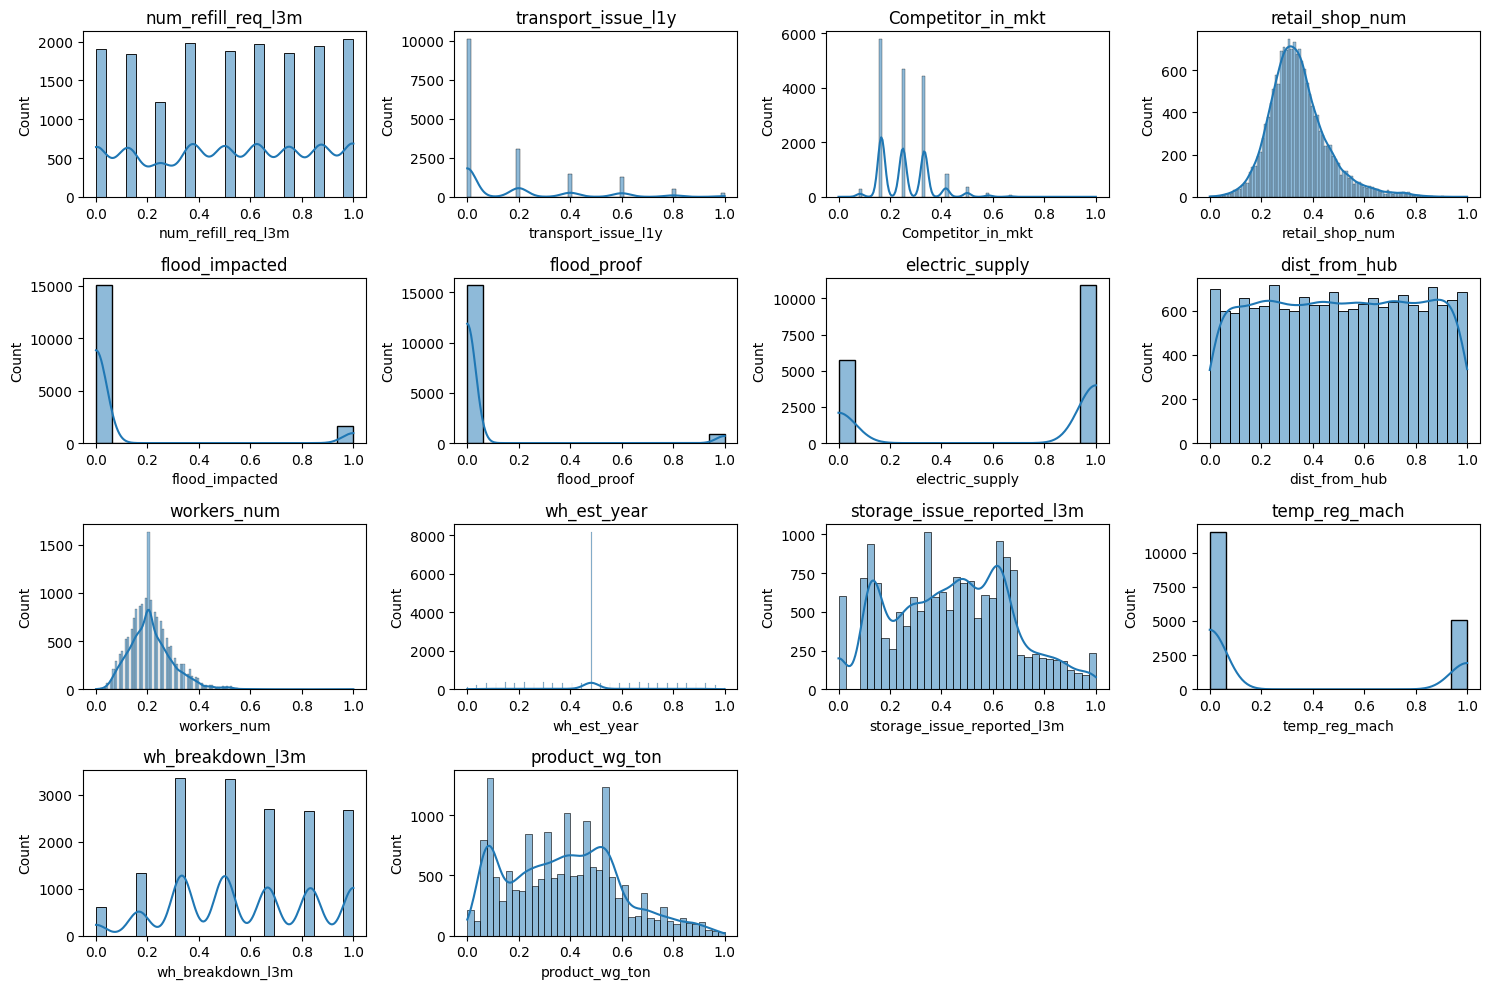

In [35]:
# Plot histograms for numerical features
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
                     'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
                     'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Box Plots<b>
</div>

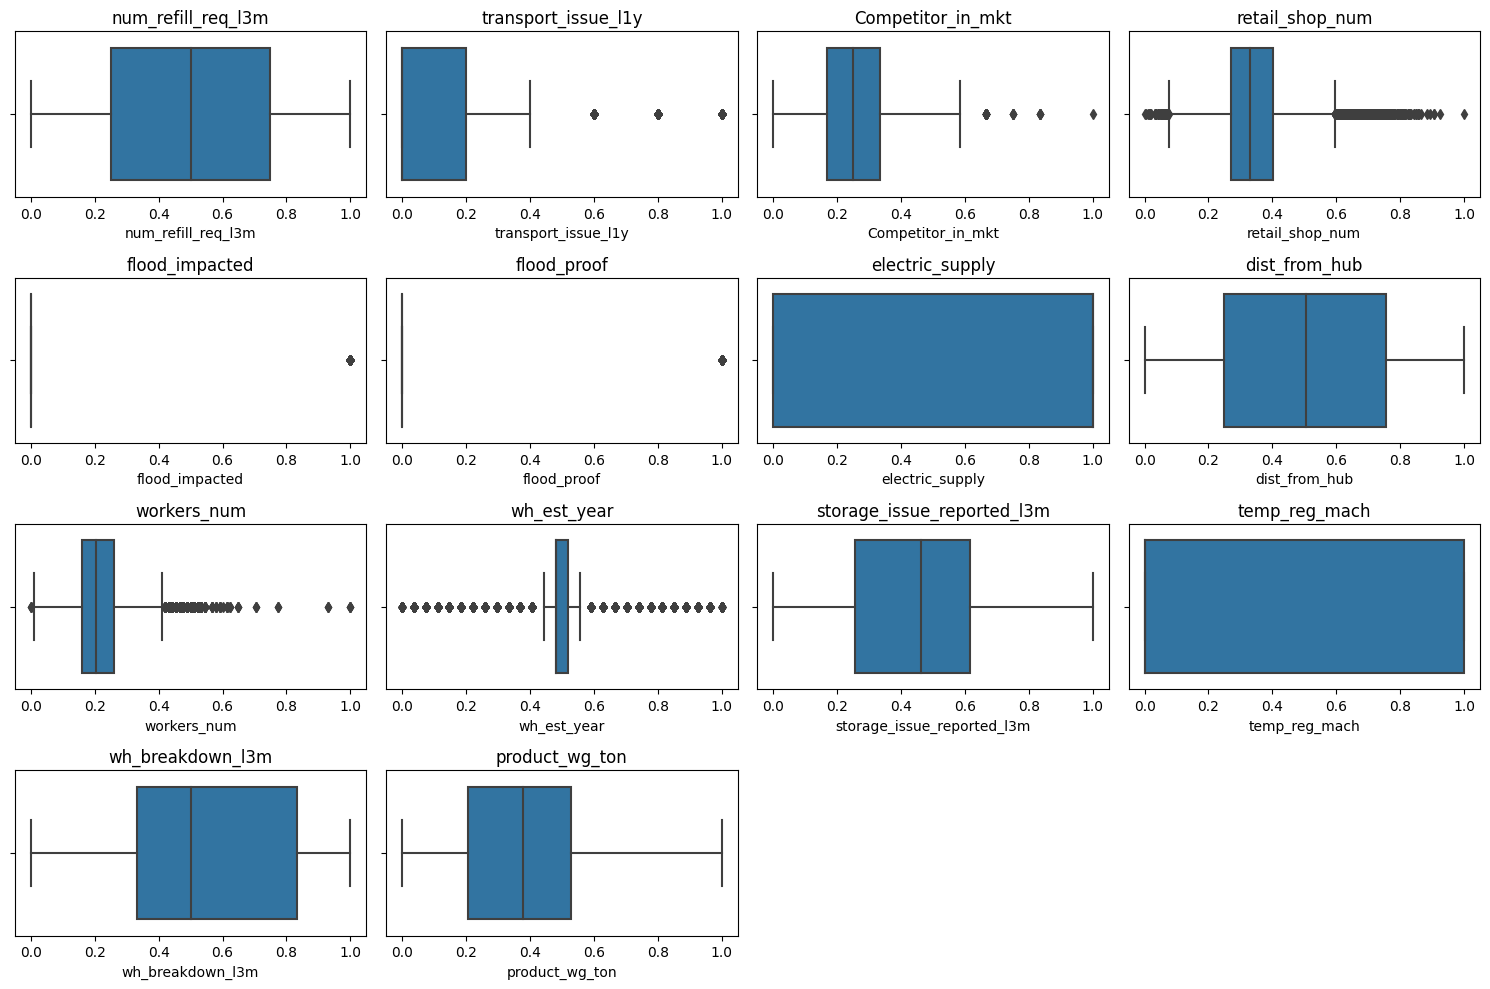

In [36]:
# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

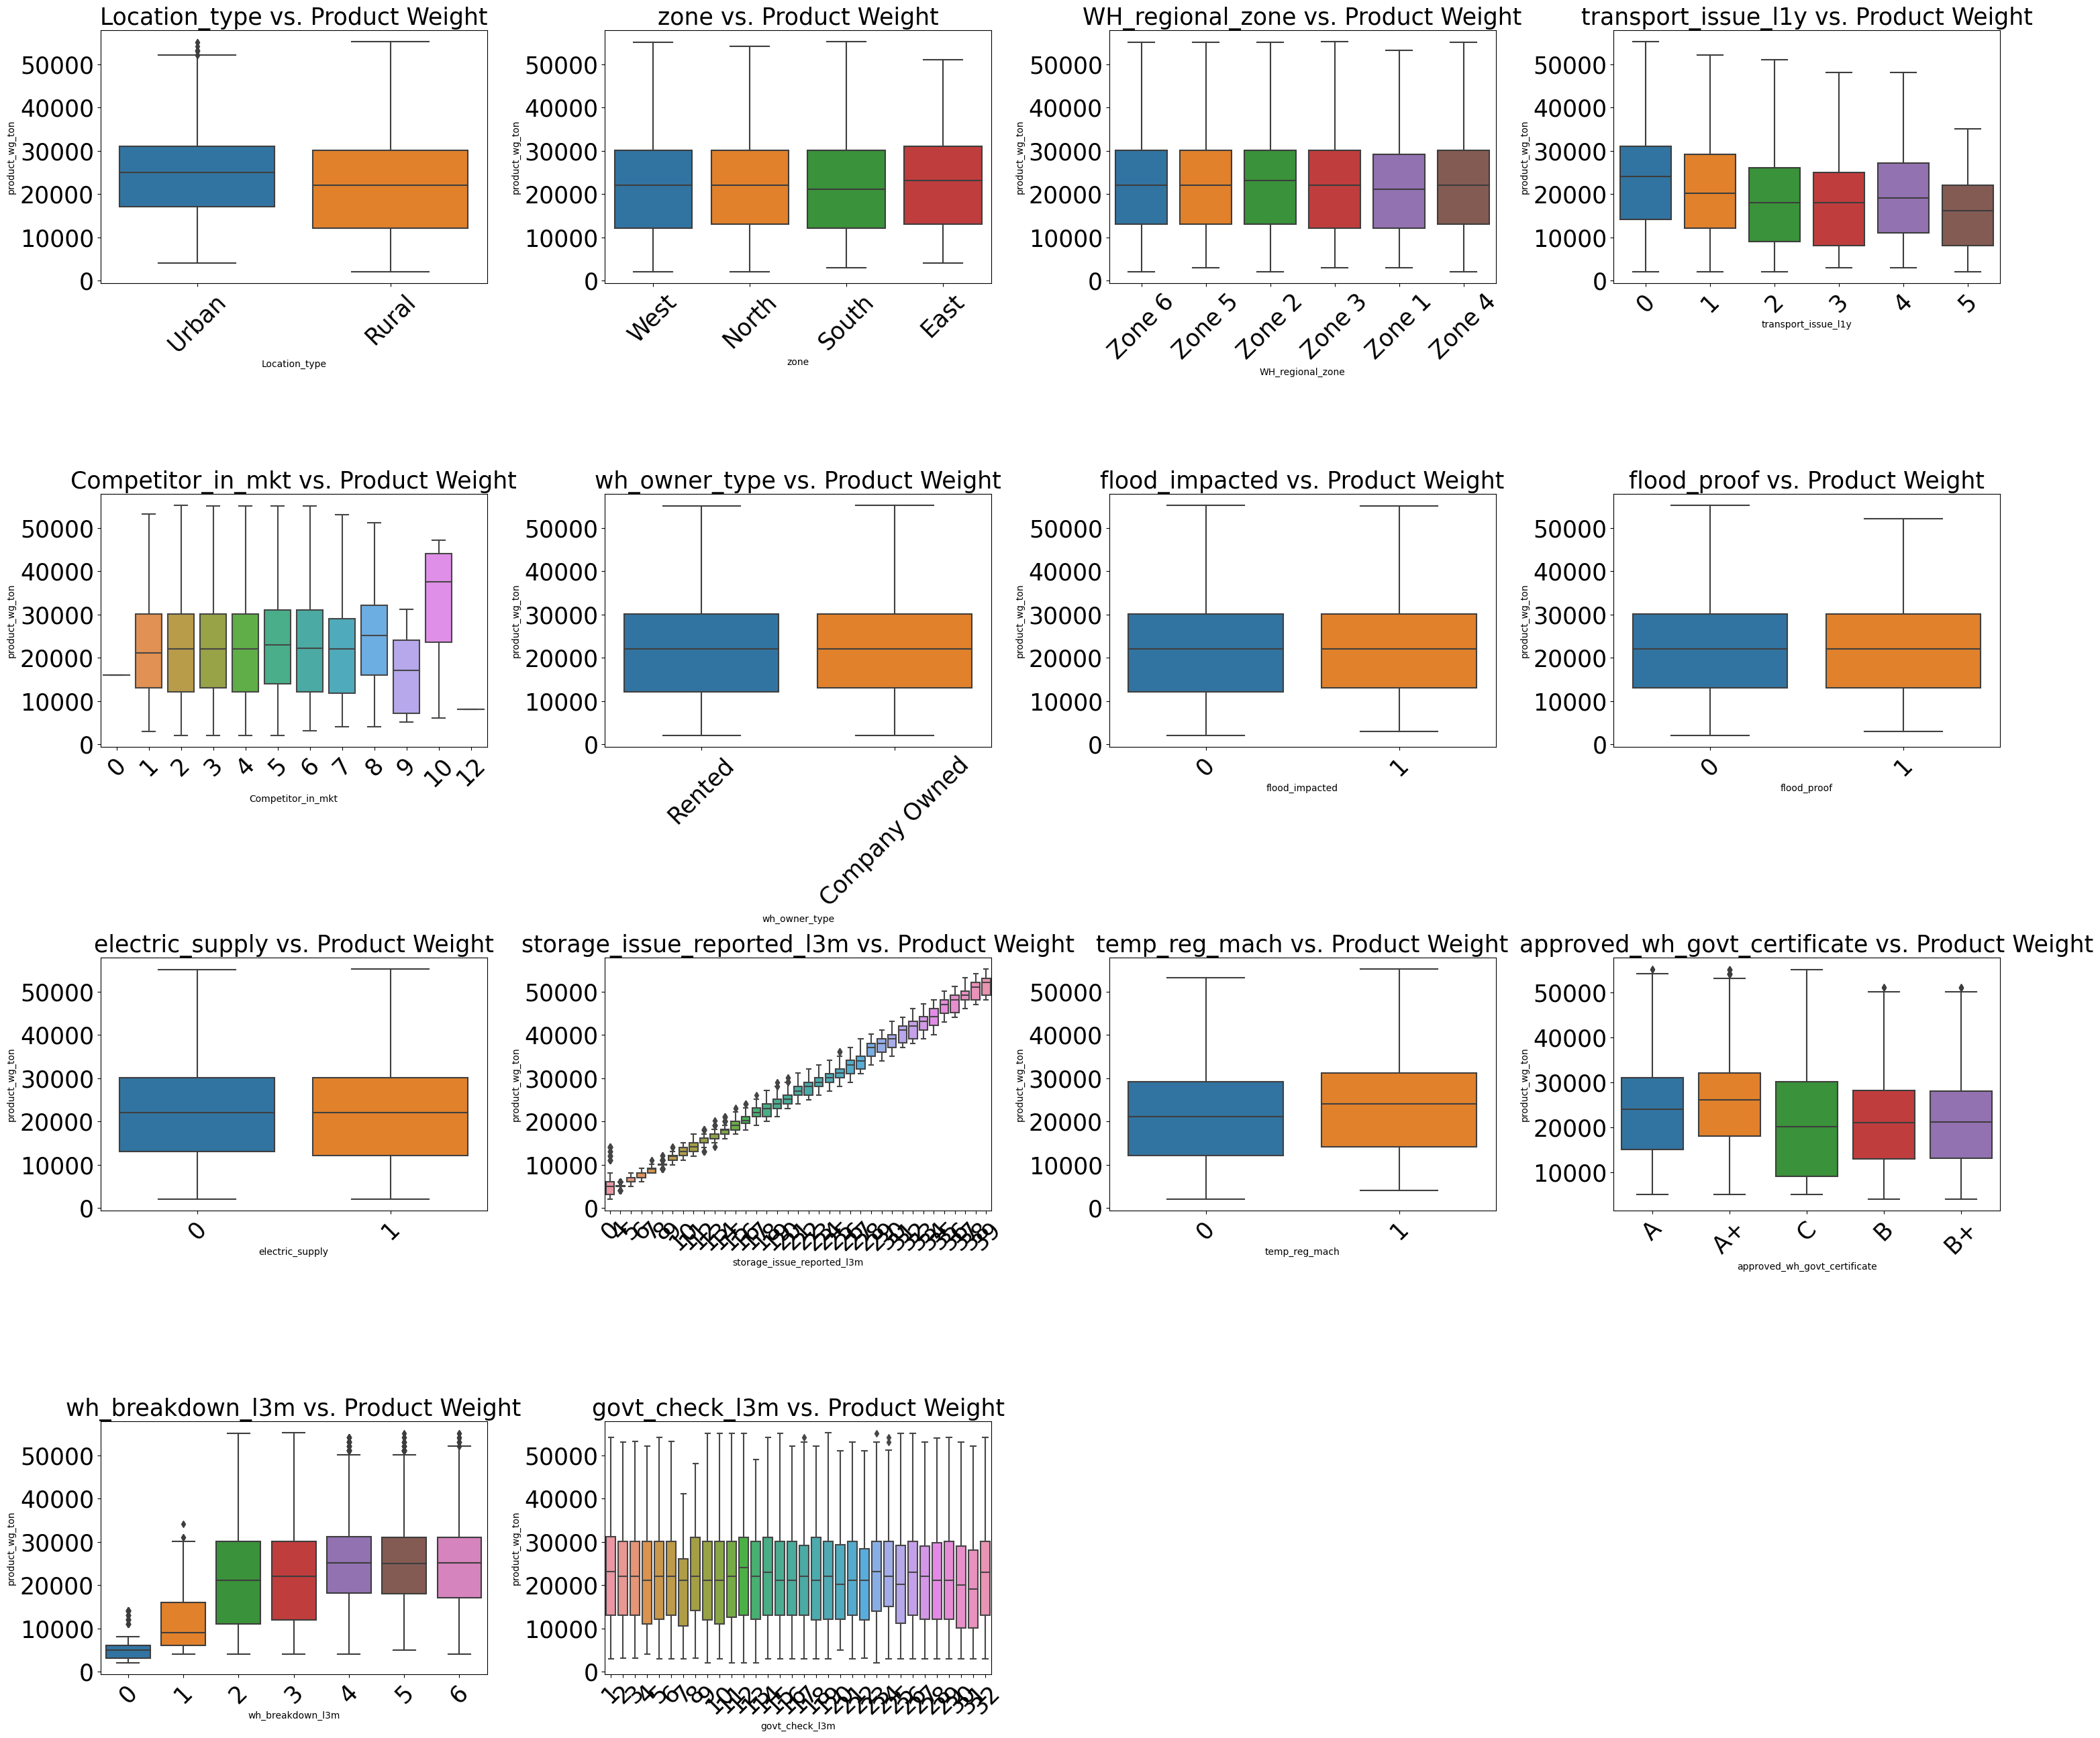

In [37]:
# Box Plots
plt.figure(figsize=(30, 26))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=data, x=feature, y='product_wg_ton')
    plt.xticks(rotation=45, fontsize=25)  
    plt.yticks(fontsize=25)  
    plt.title(f'{feature} vs. Product Weight', fontsize=25)  

plt.tight_layout()
plt.show()

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Density Plots<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
Density plots provide a smooth estimate of the probability density function for a continuous variable.
</div>

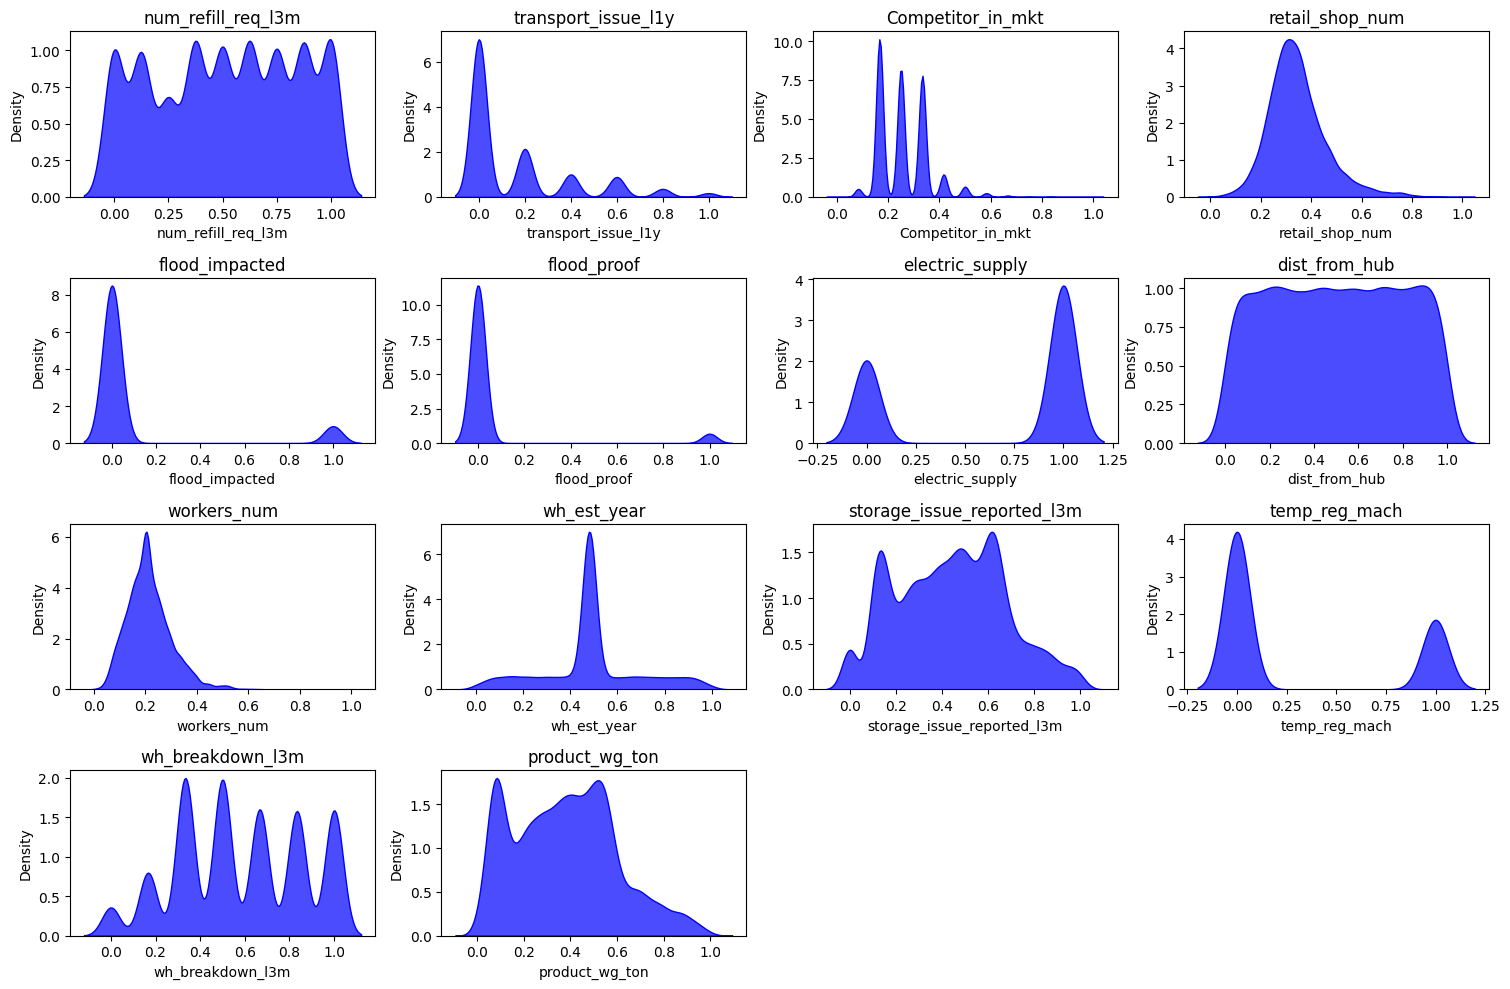

In [38]:
# Plot density plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(train_data[col], fill=True, color='blue', alpha=0.7)
    plt.title(col)
plt.tight_layout()
plt.show()


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Scatter Plots<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
Scatter plots are a great way to visualize relationships between pairs of numerical variables.</div>

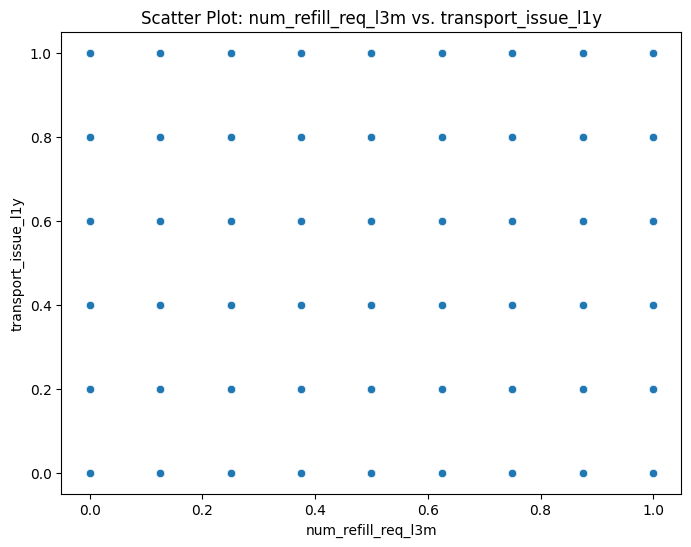

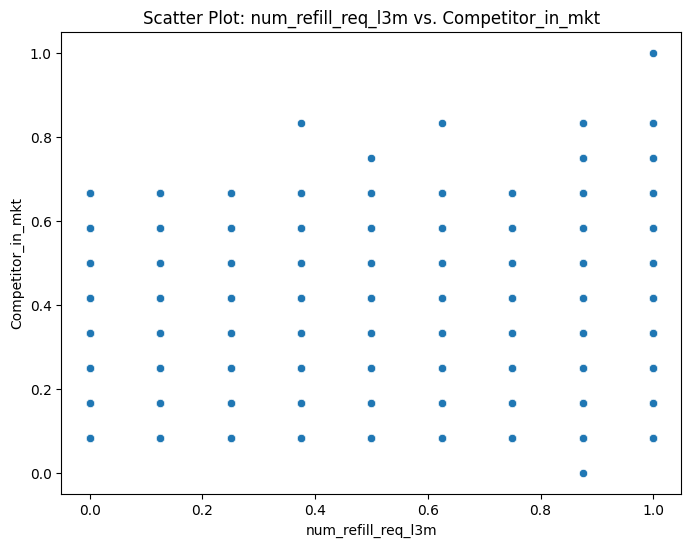

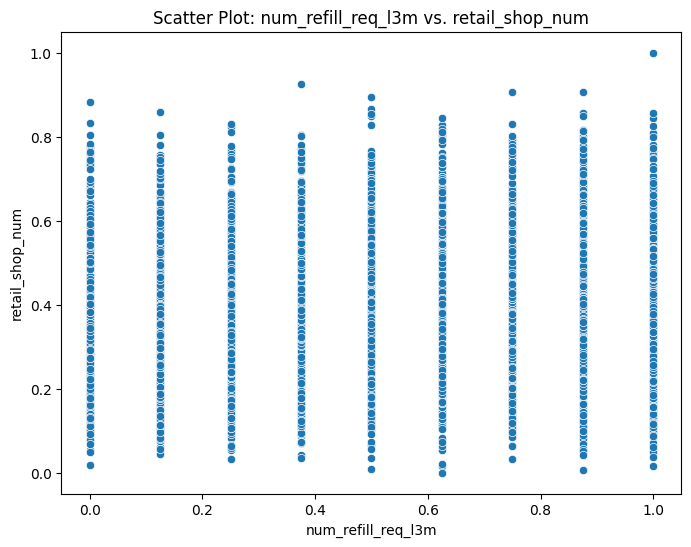

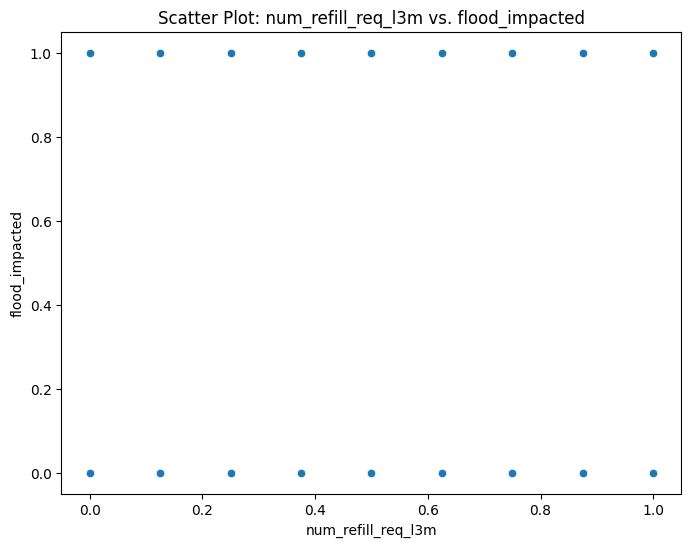

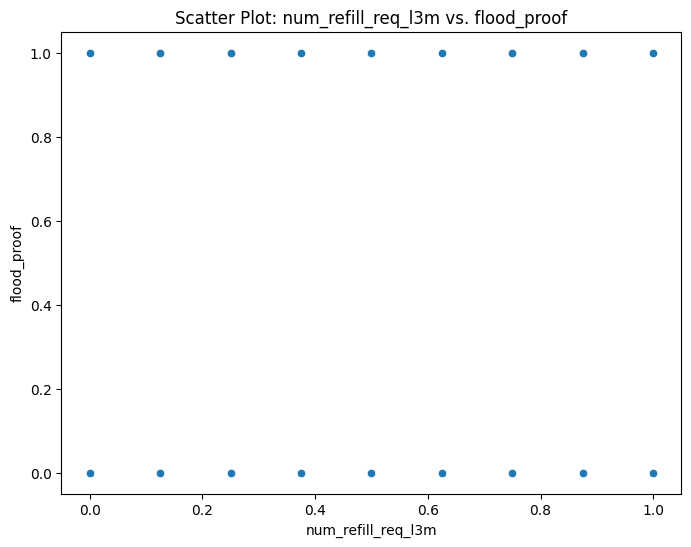

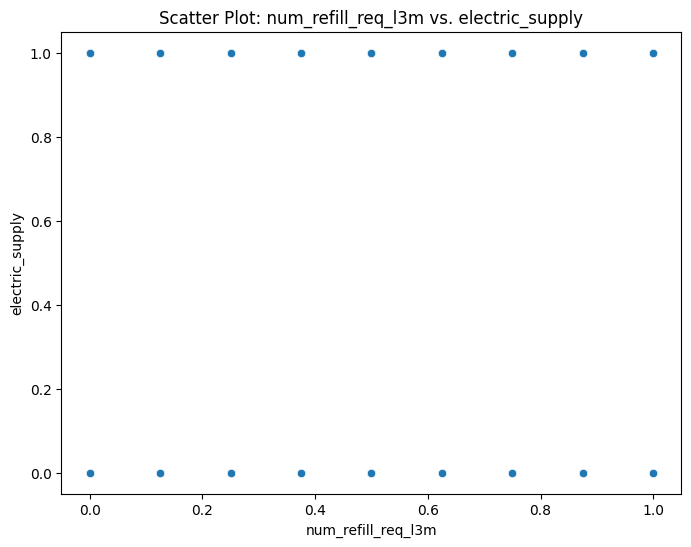

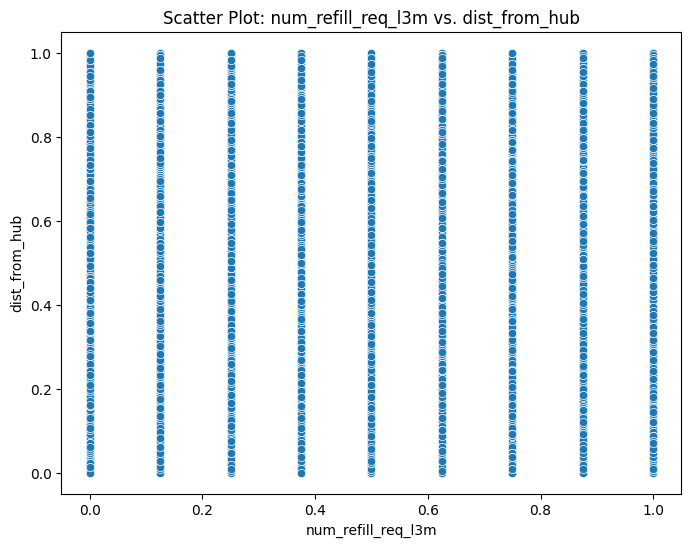

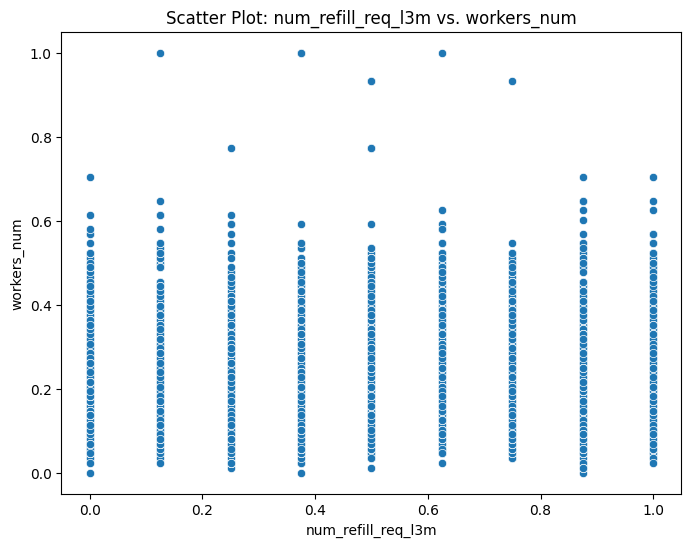

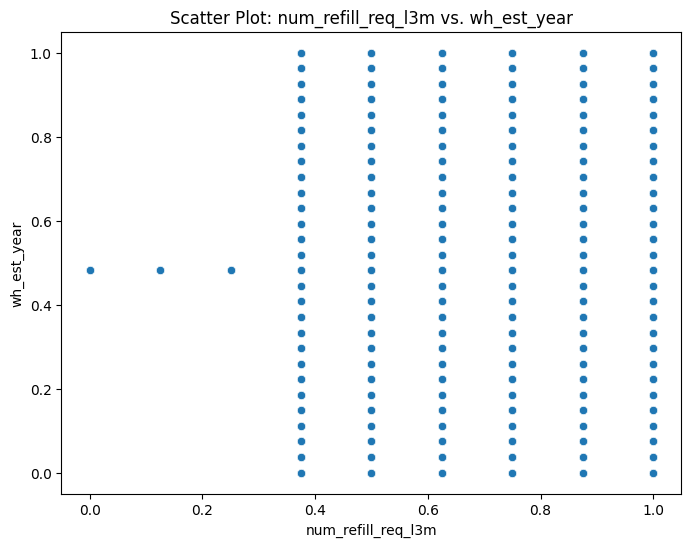

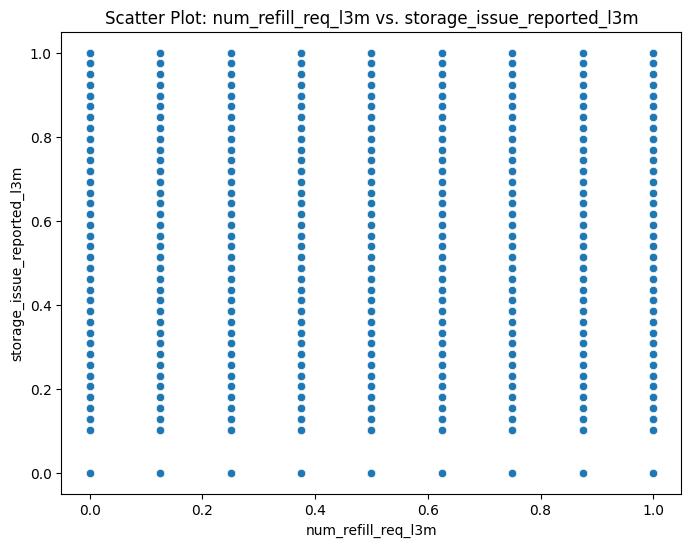

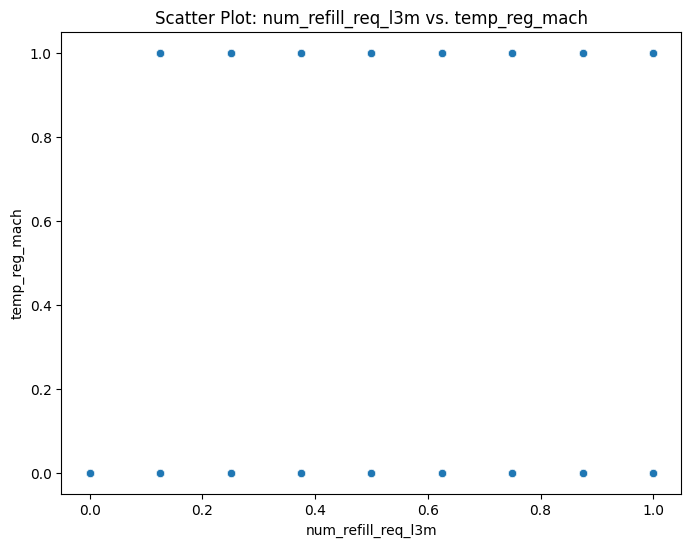

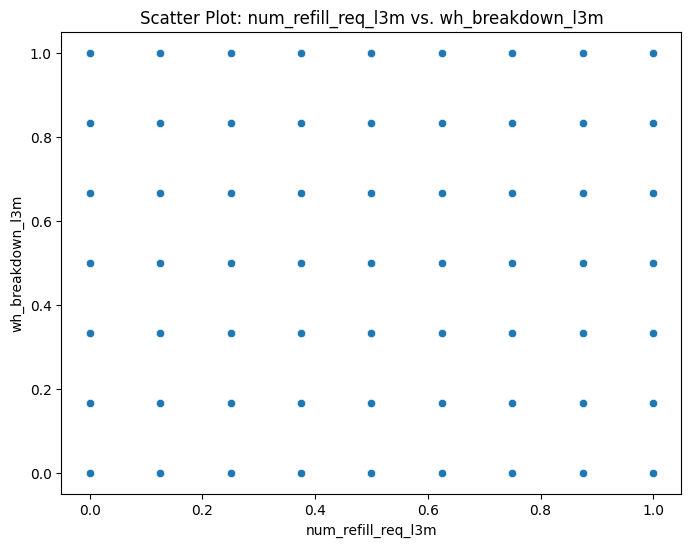

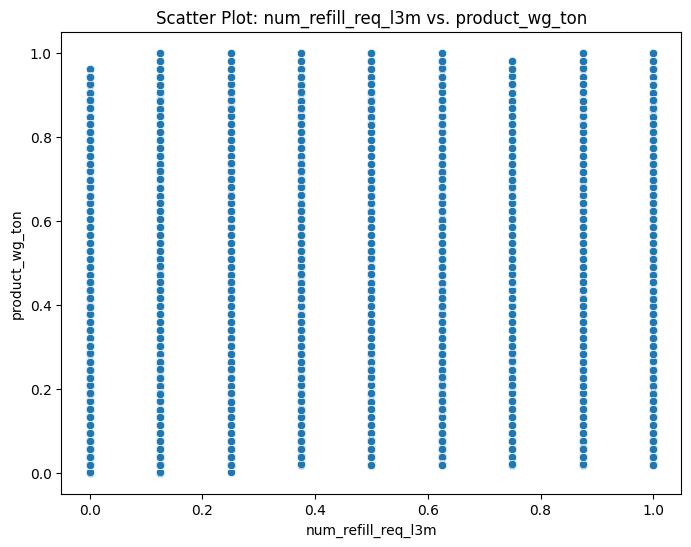

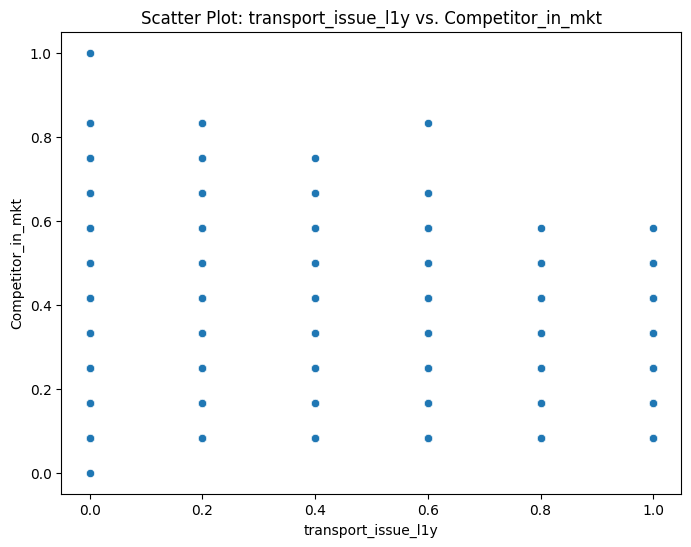

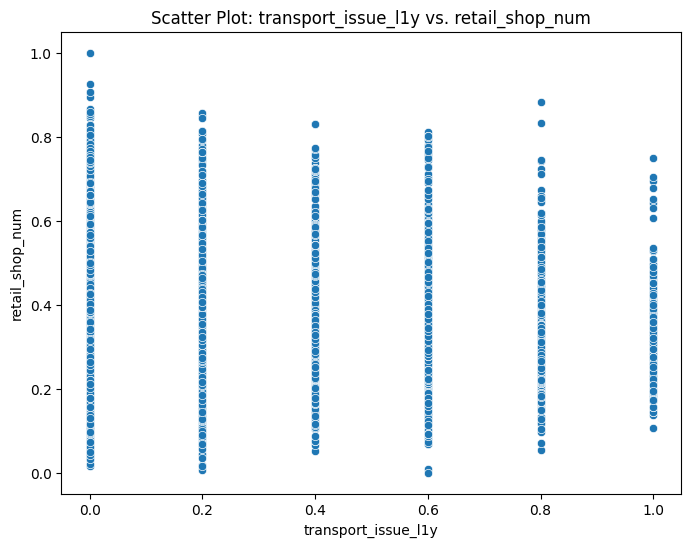

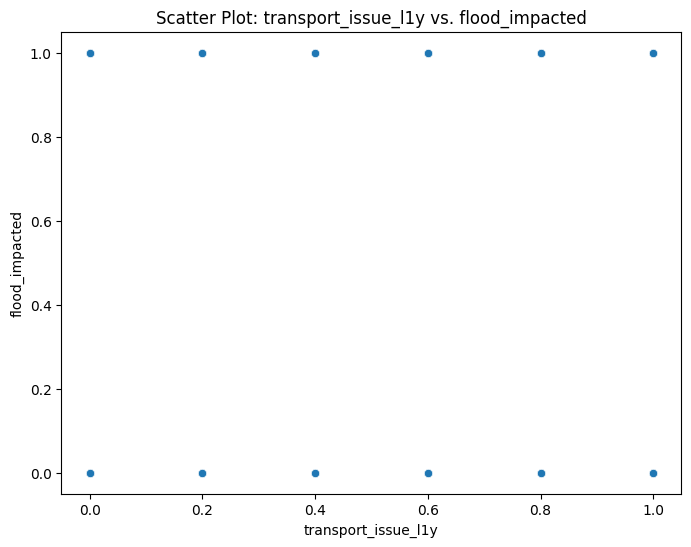

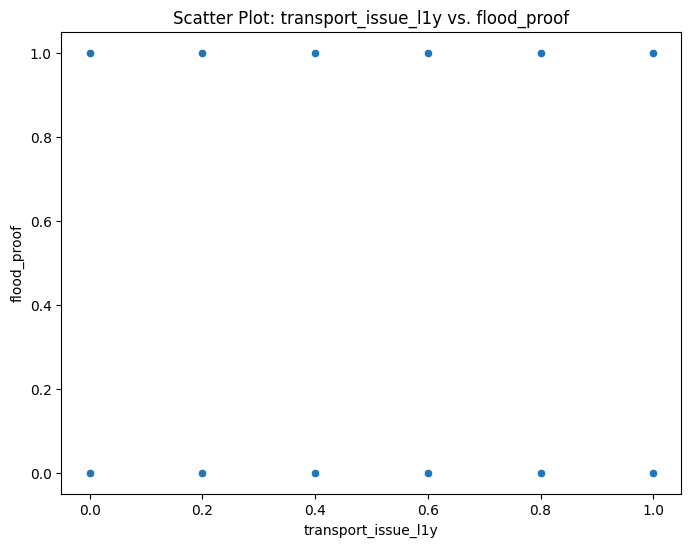

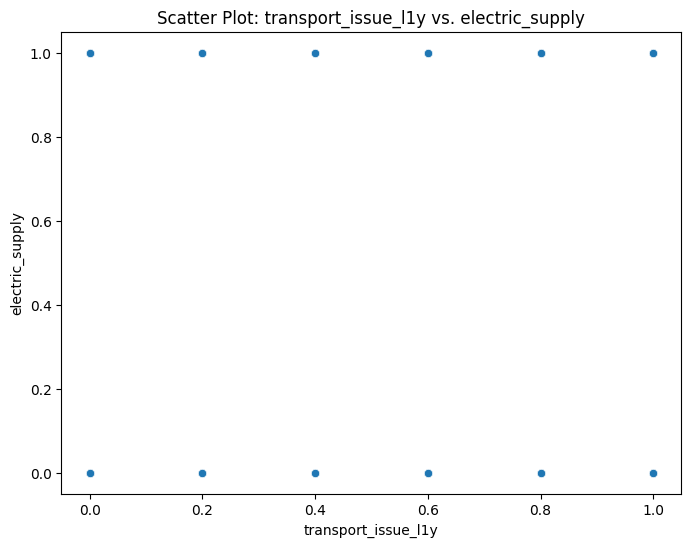

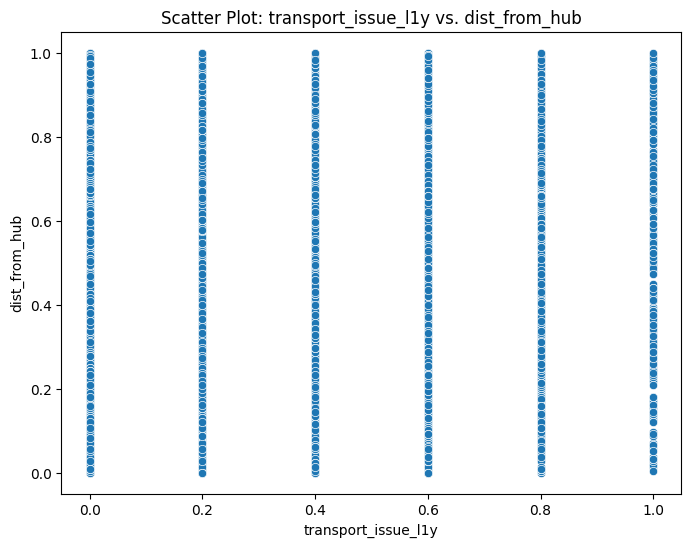

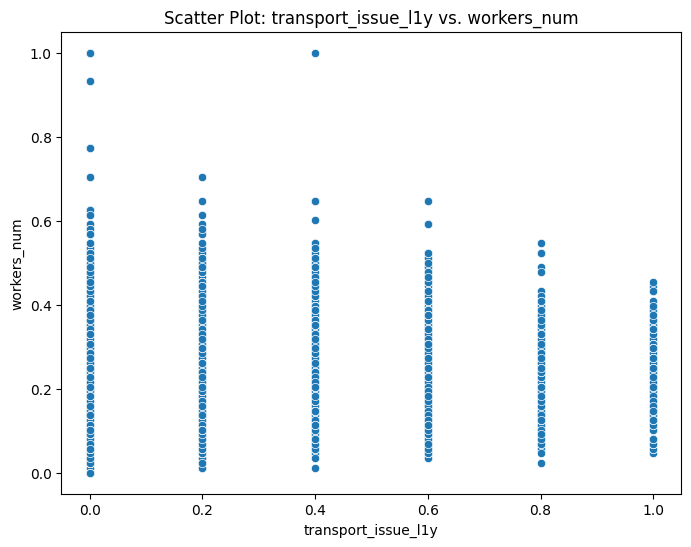

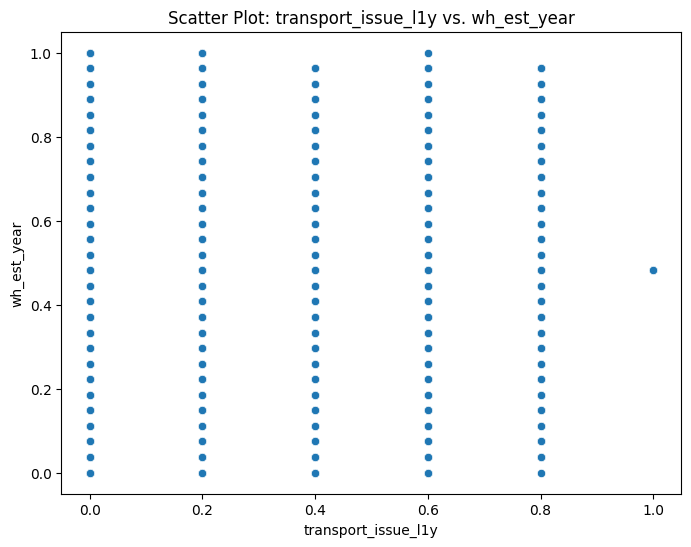

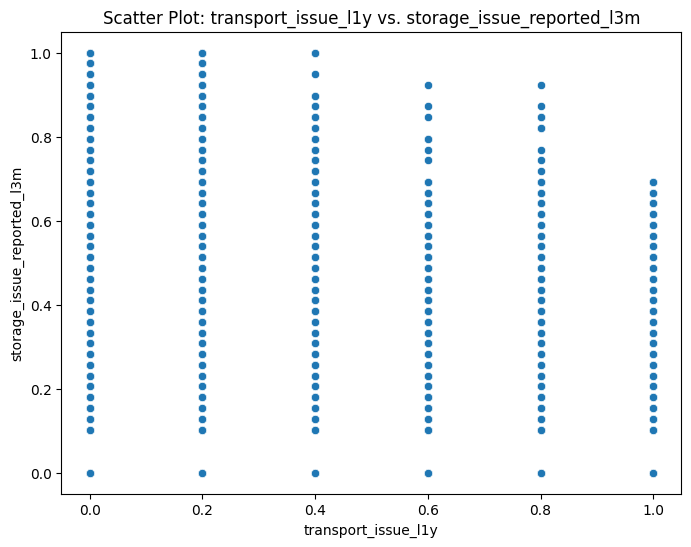

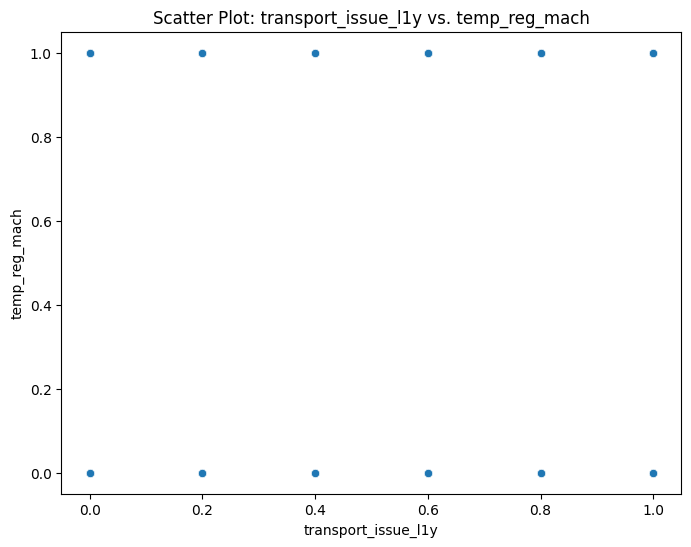

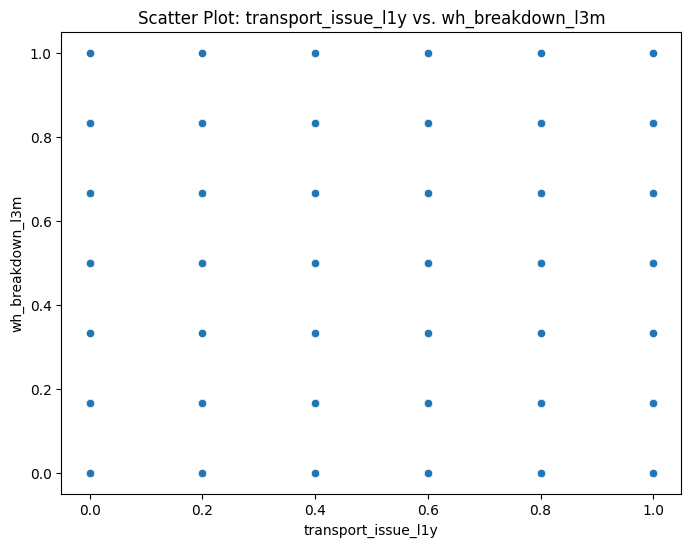

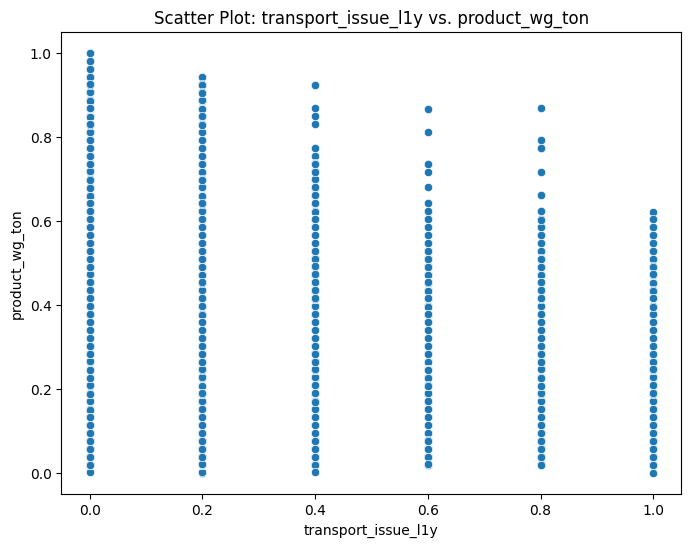

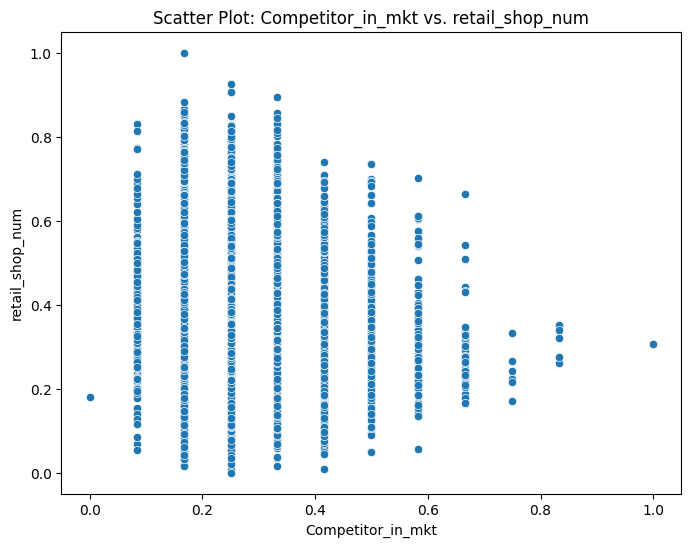

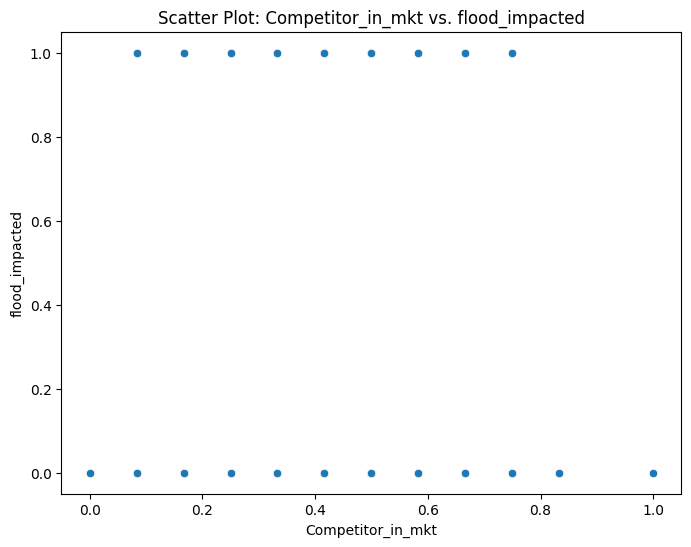

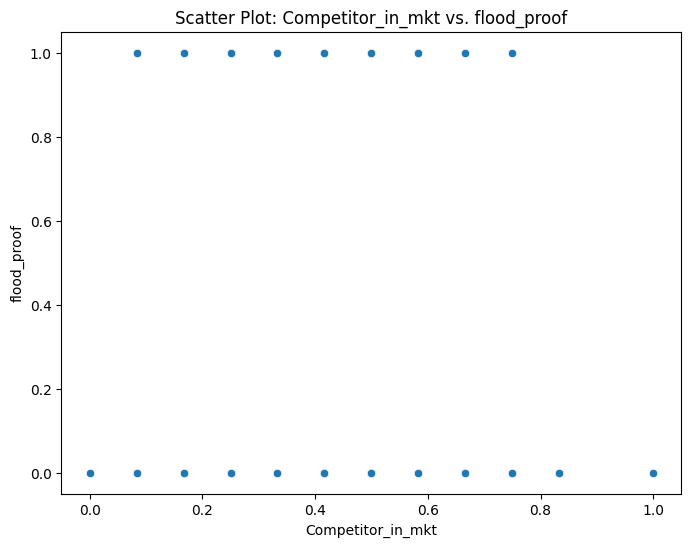

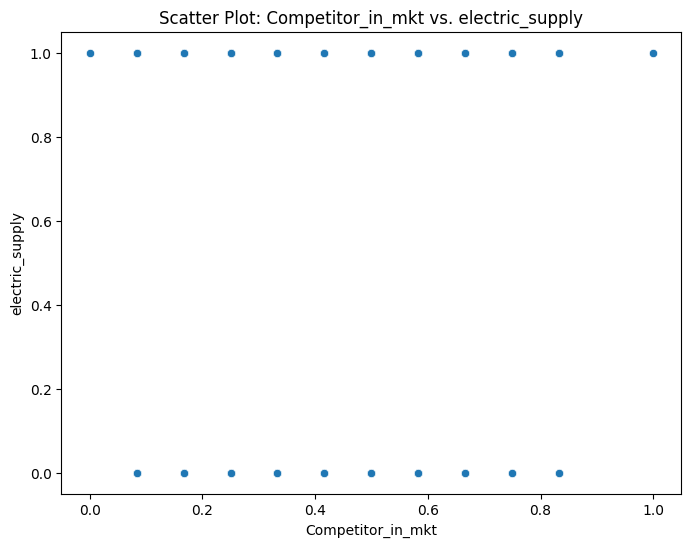

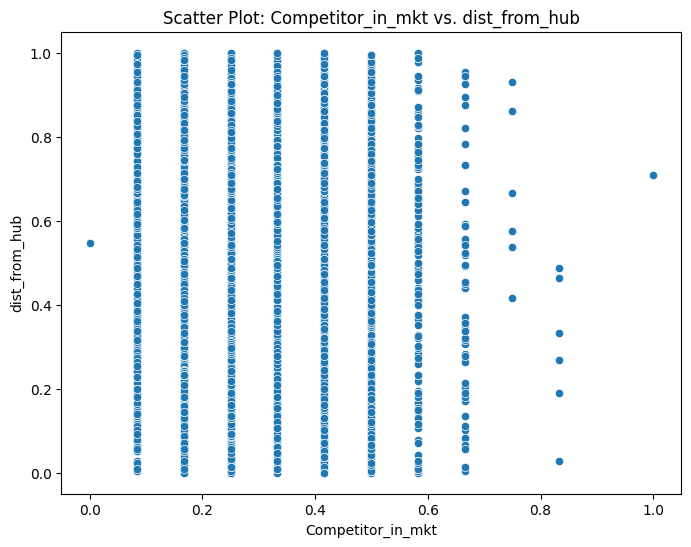

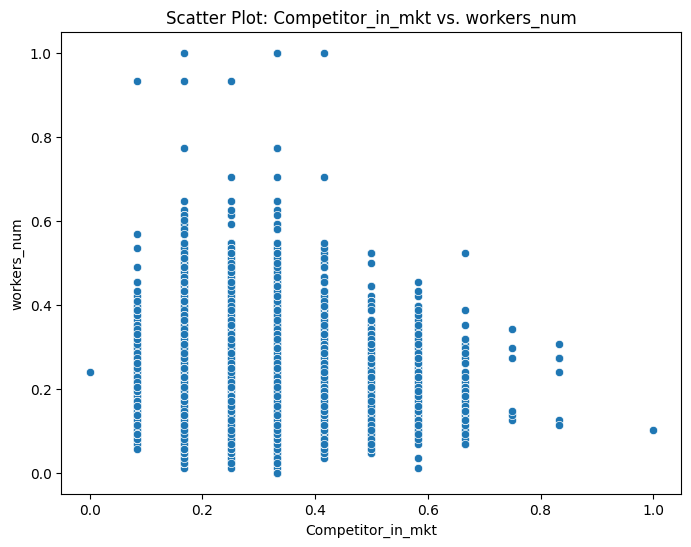

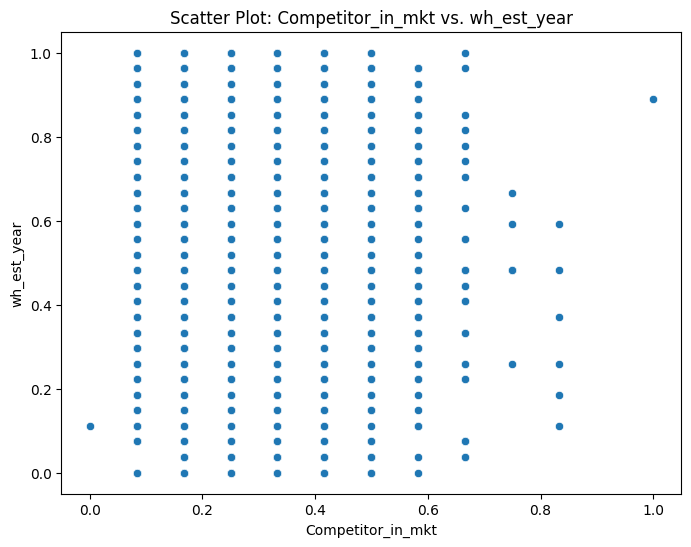

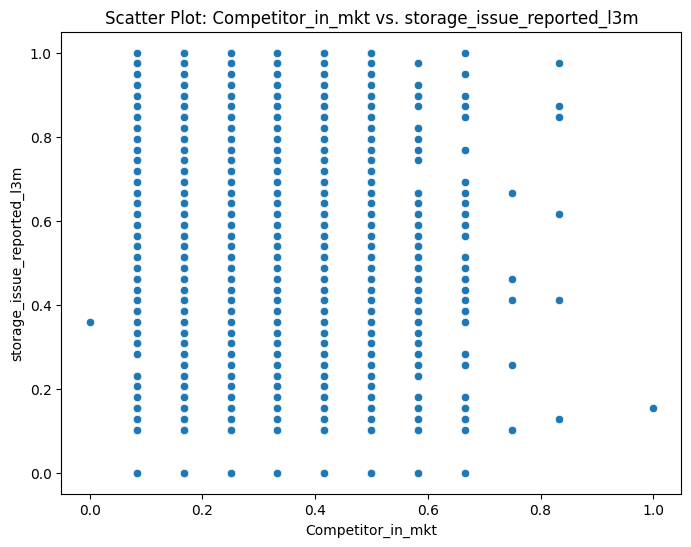

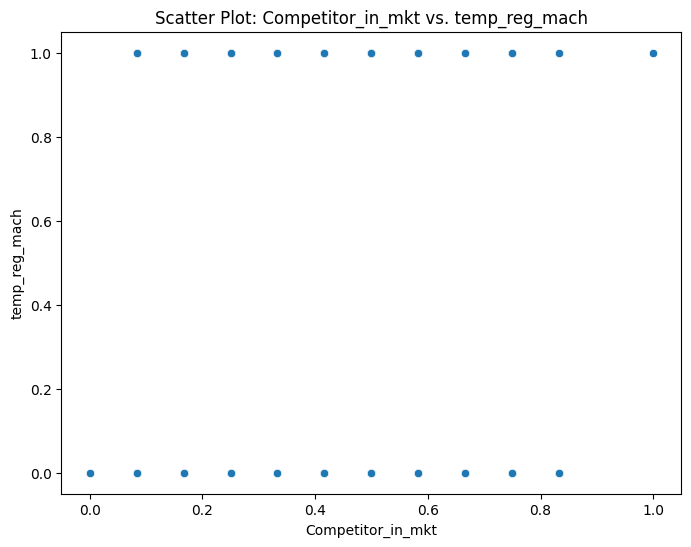

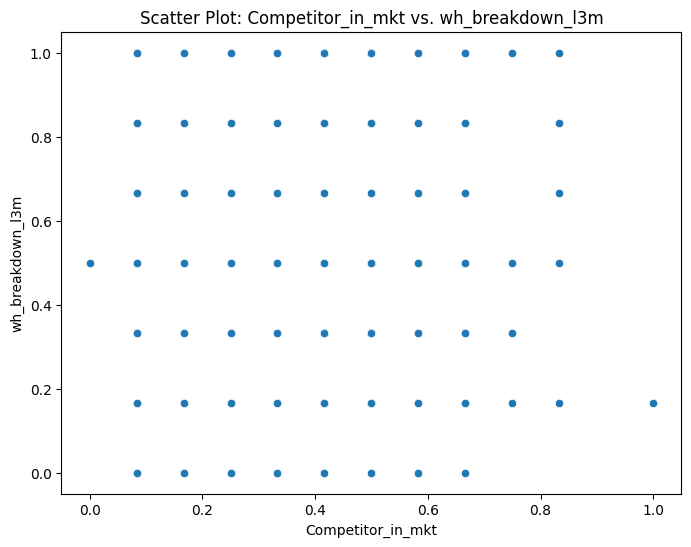

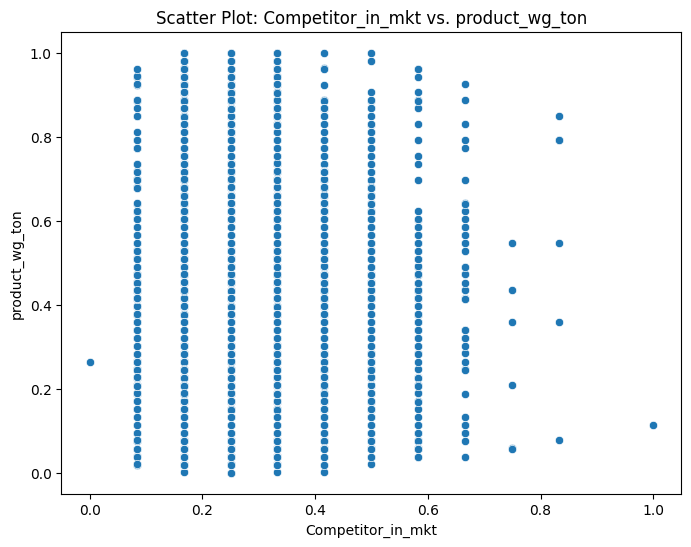

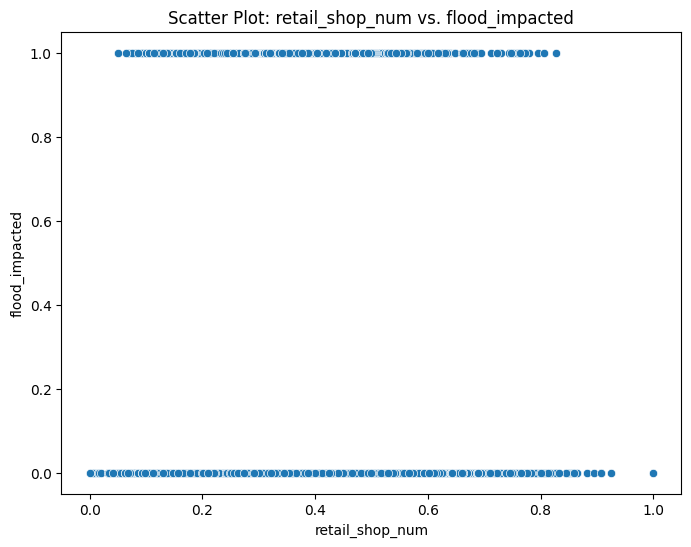

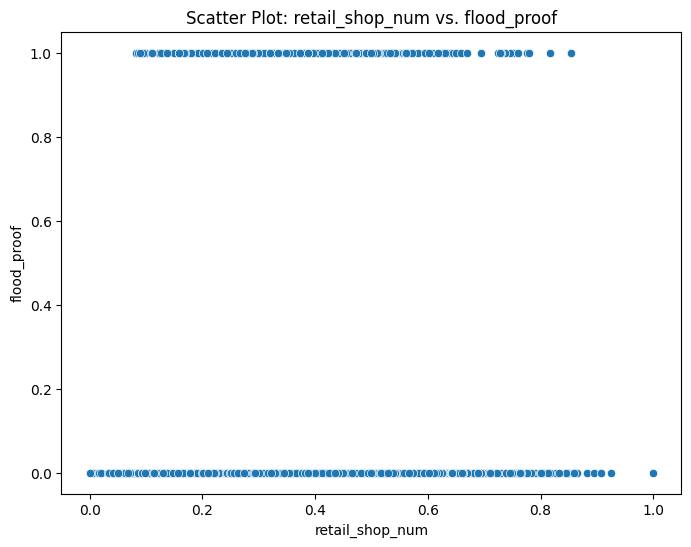

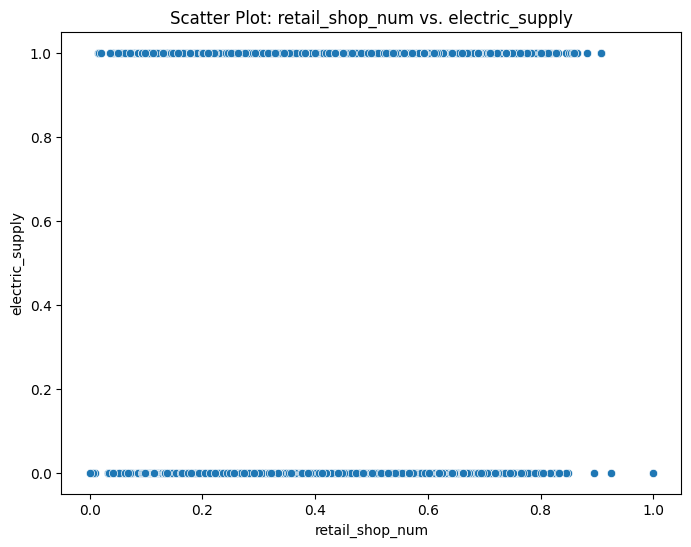

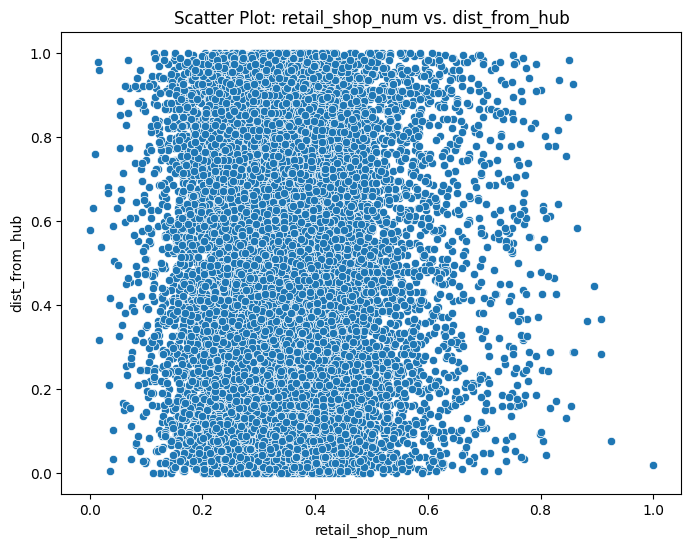

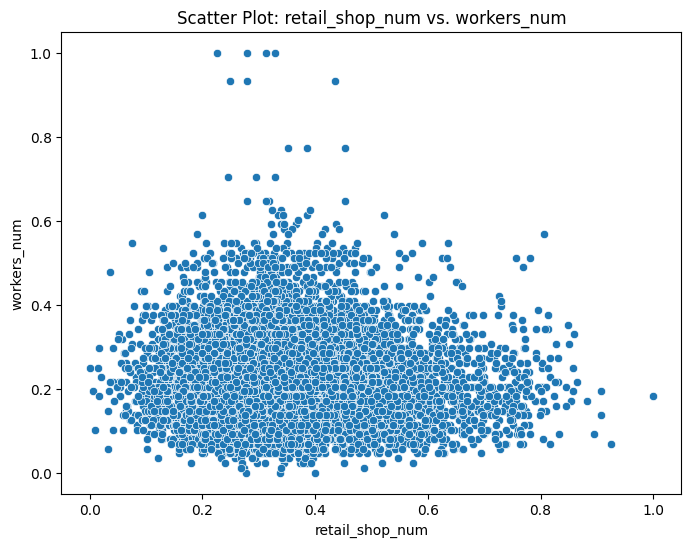

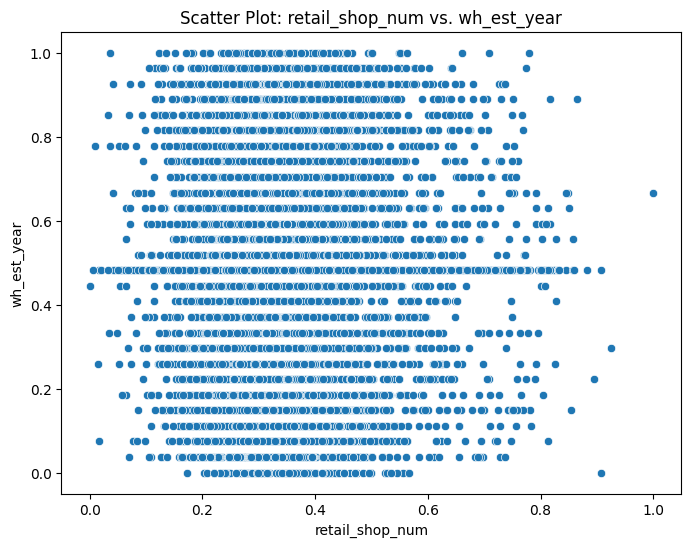

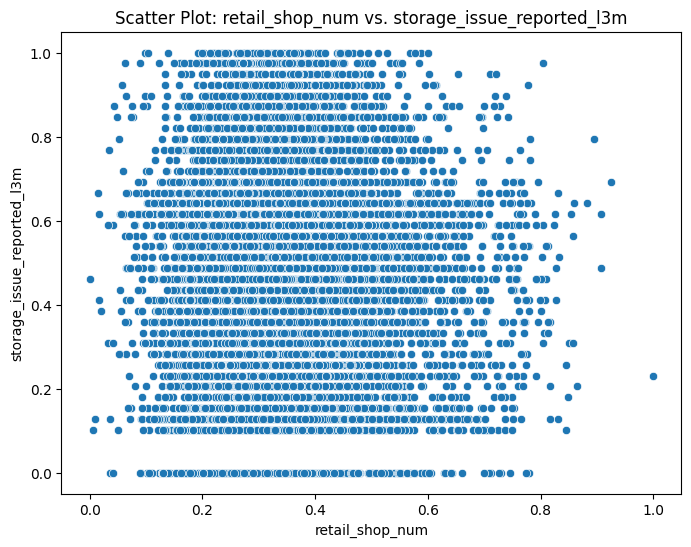

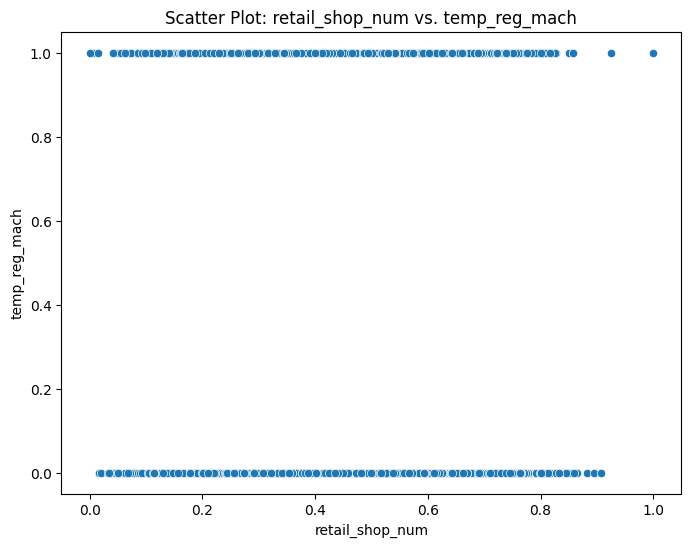

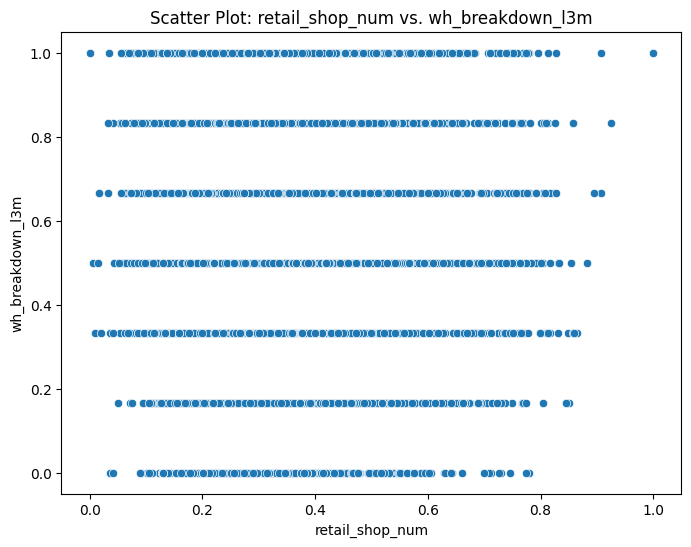

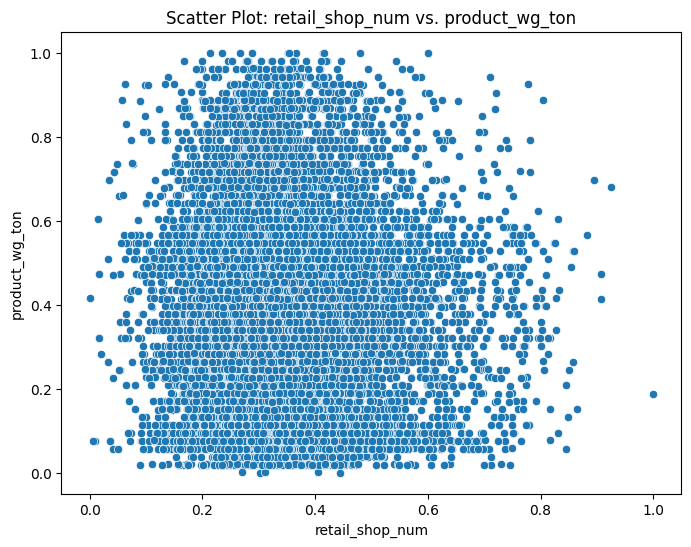

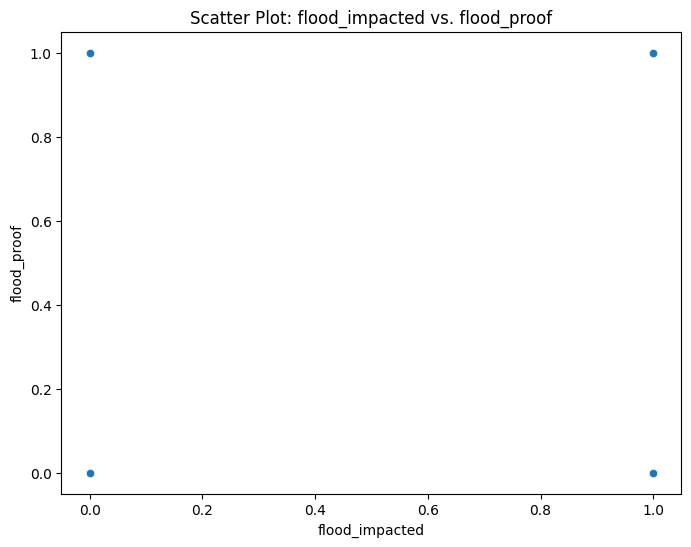

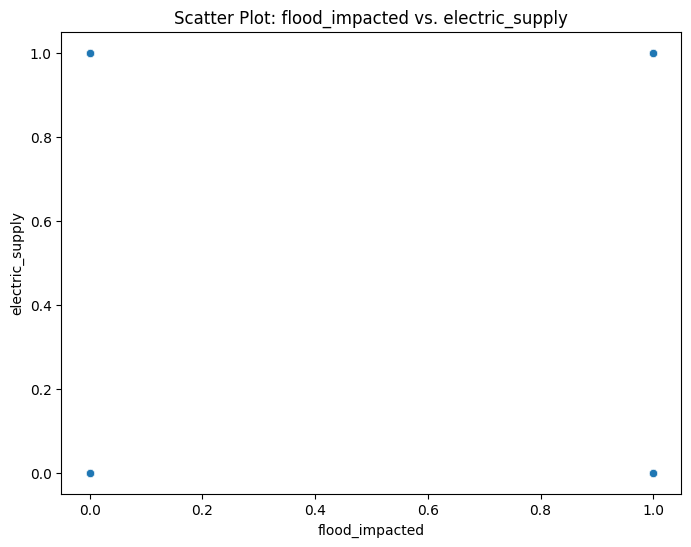

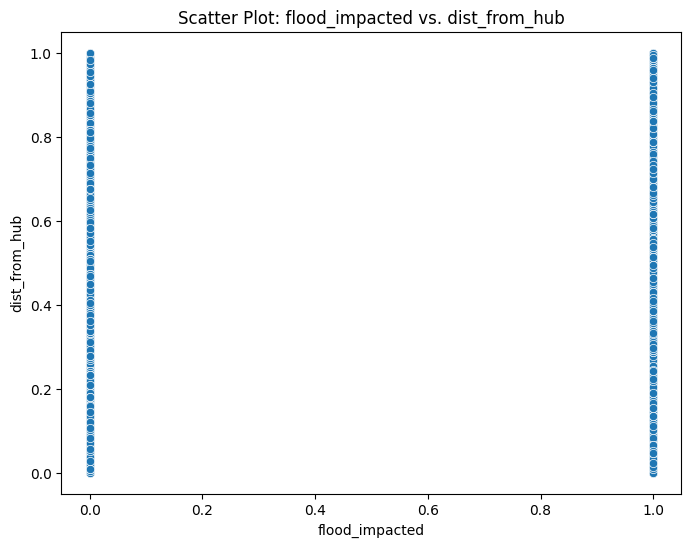

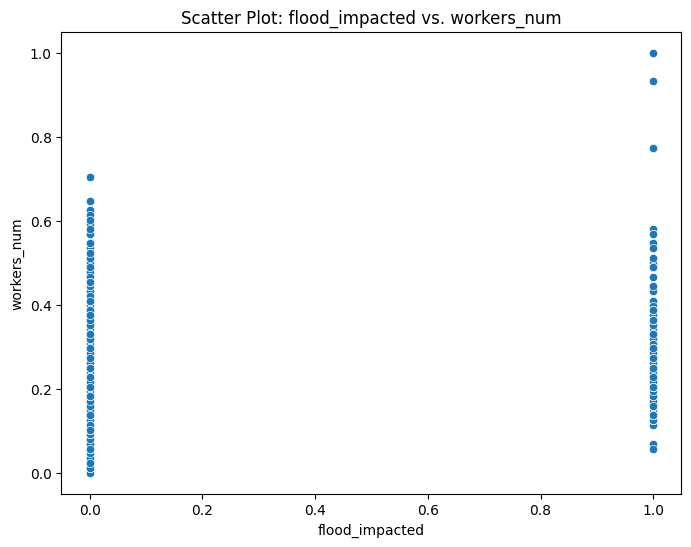

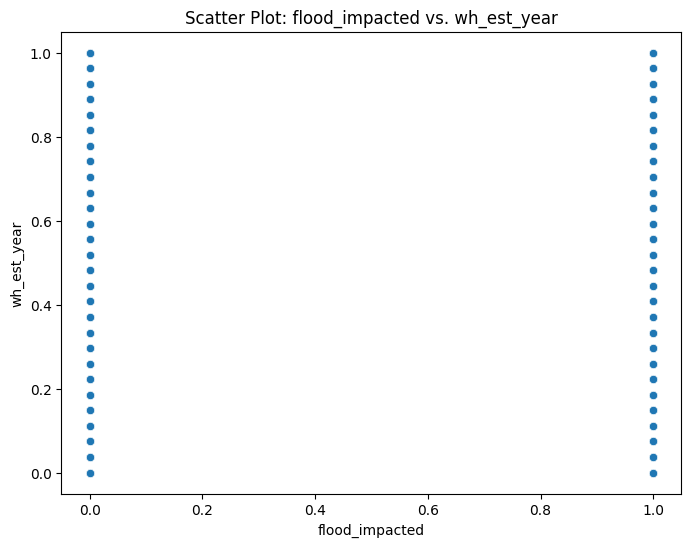

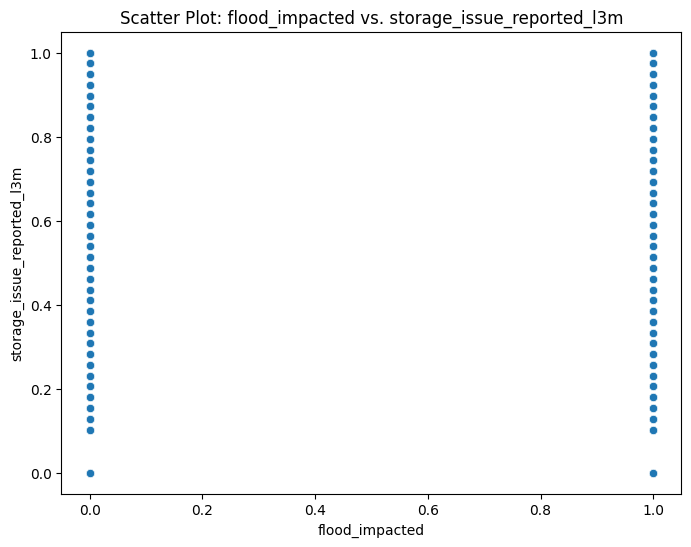

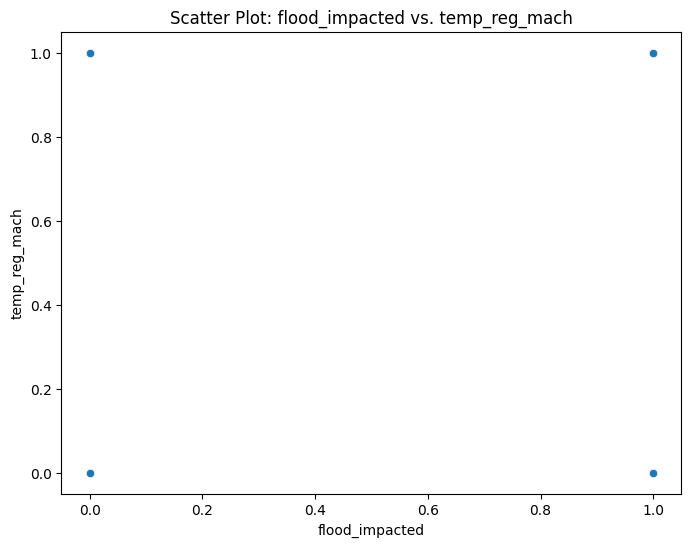

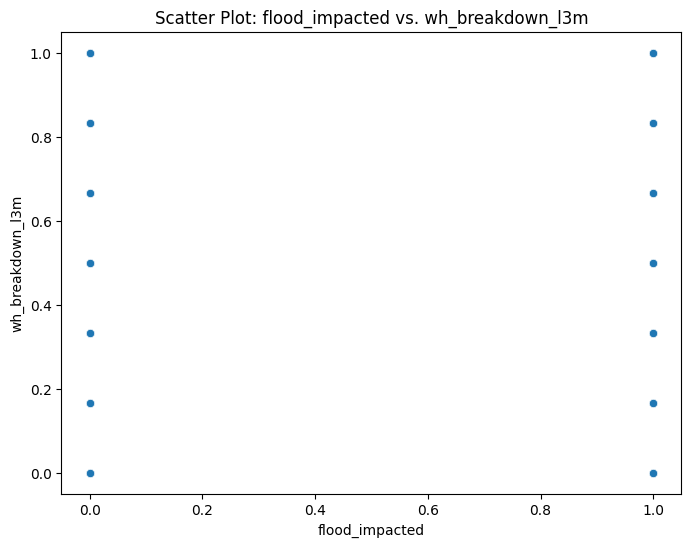

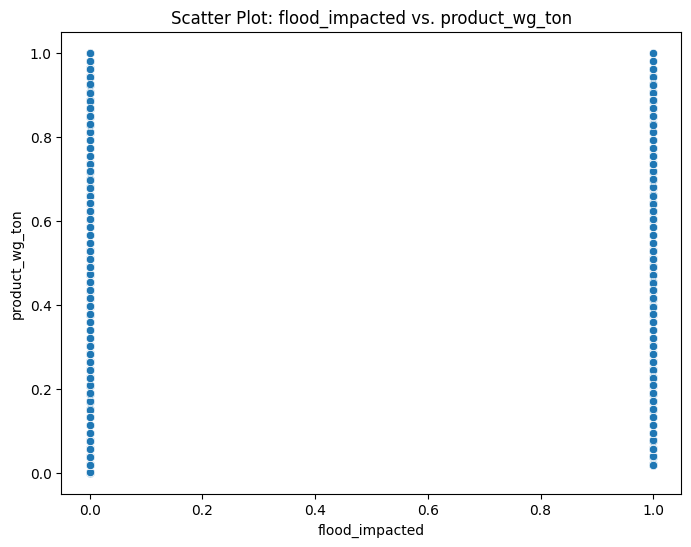

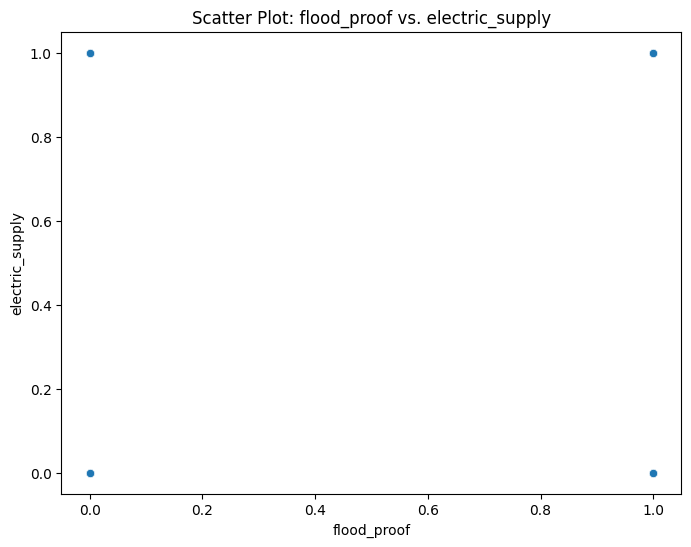

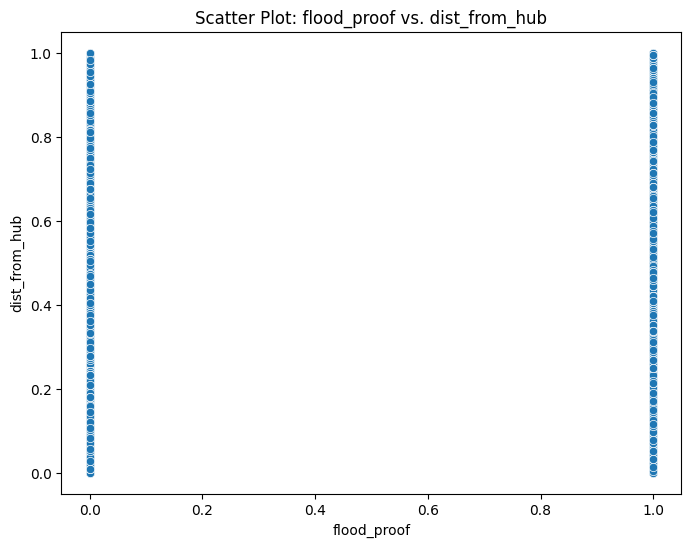

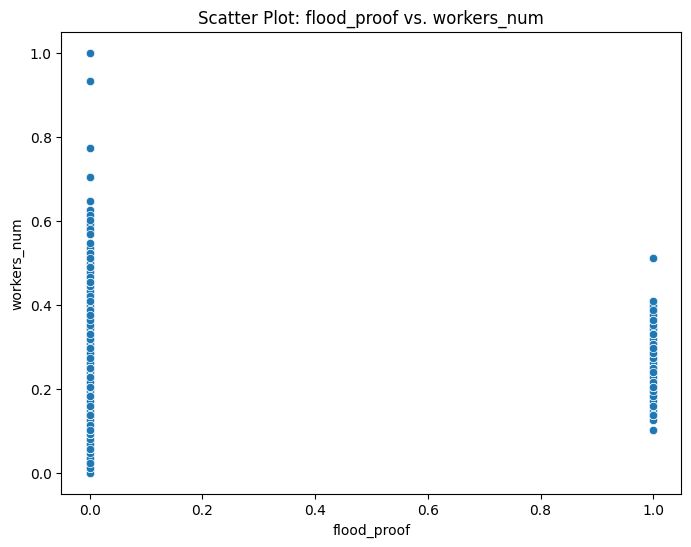

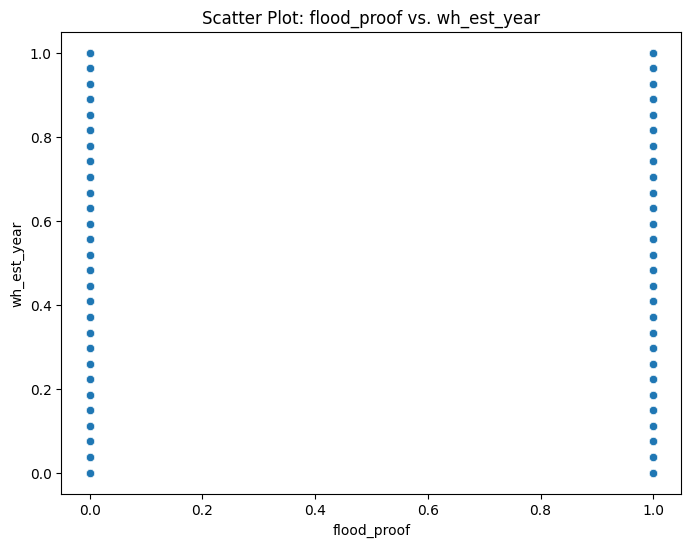

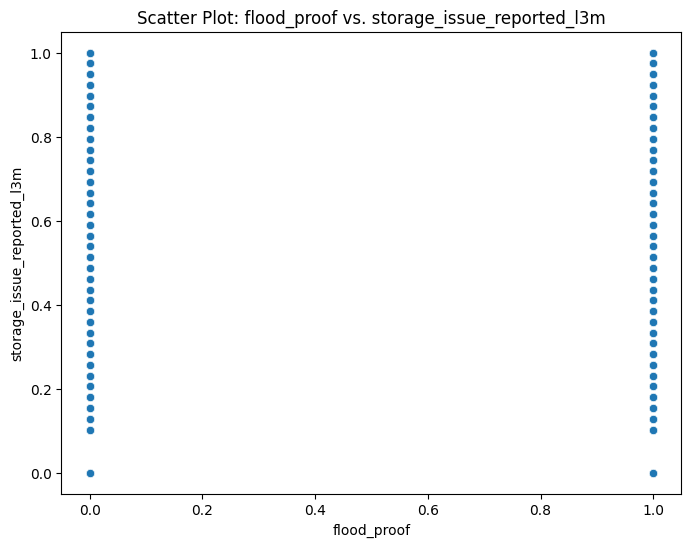

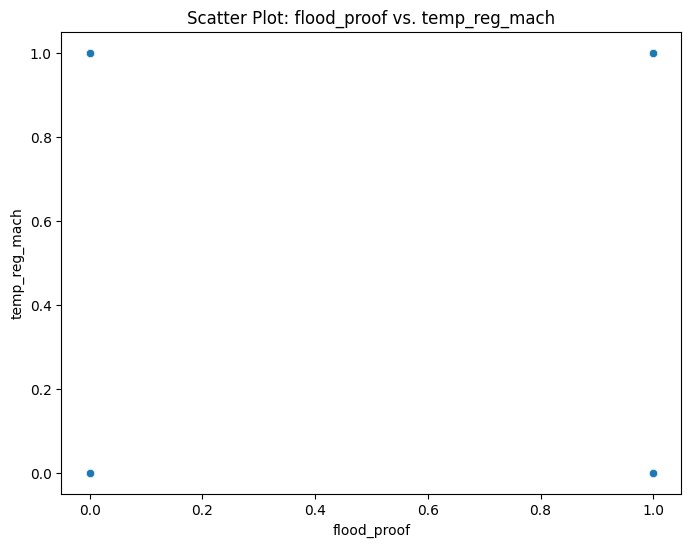

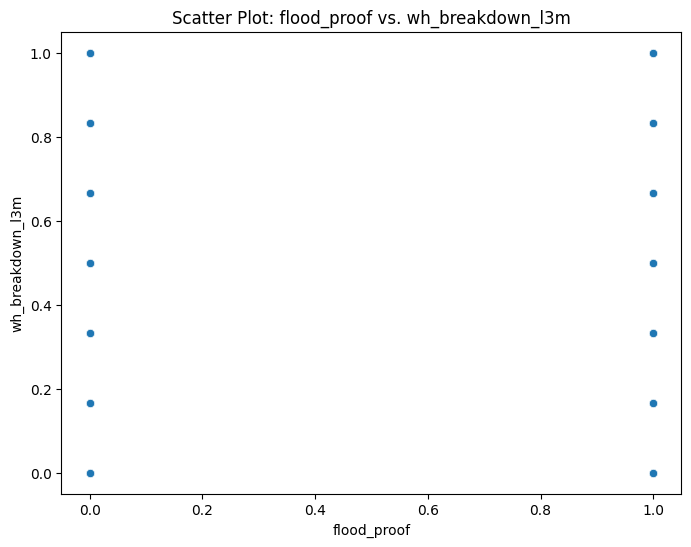

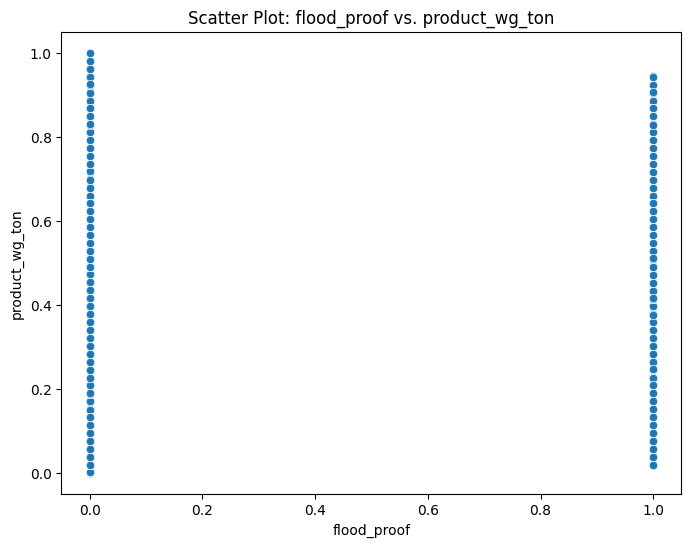

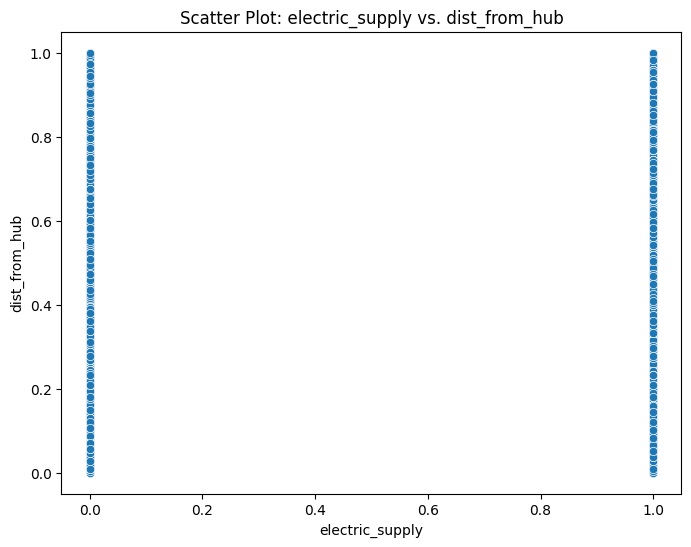

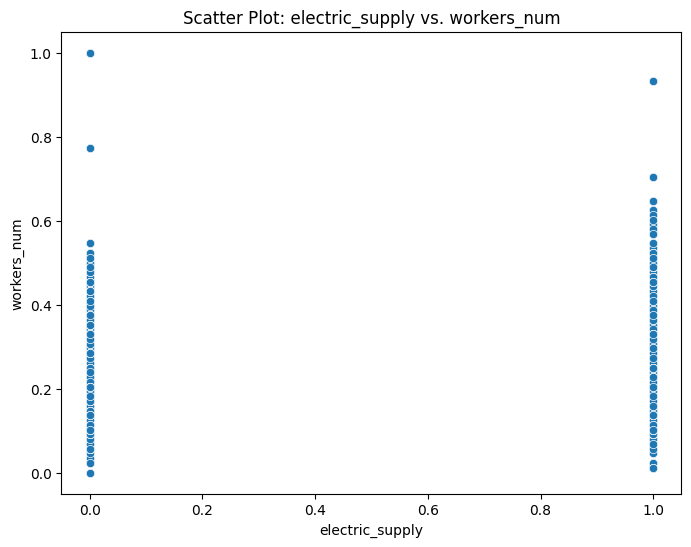

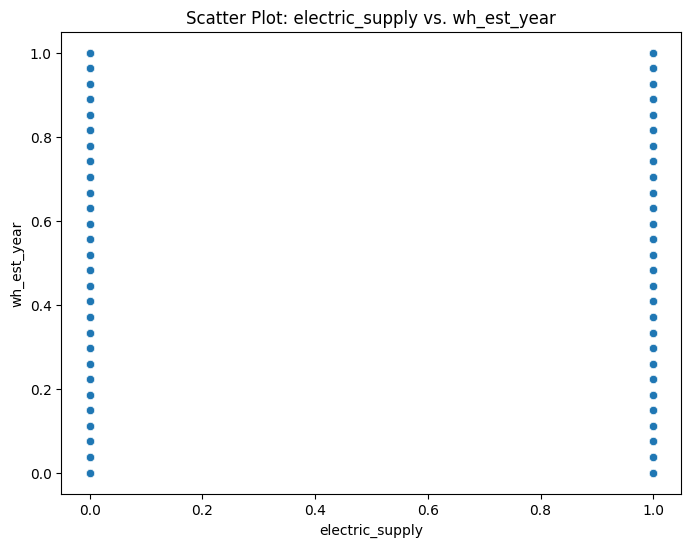

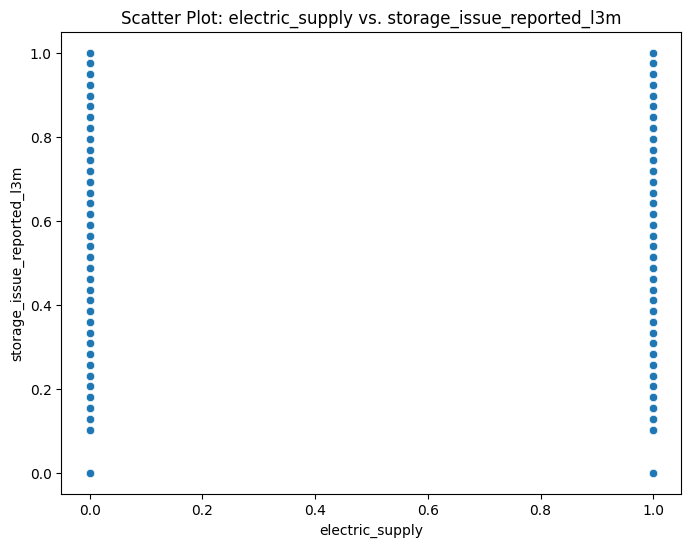

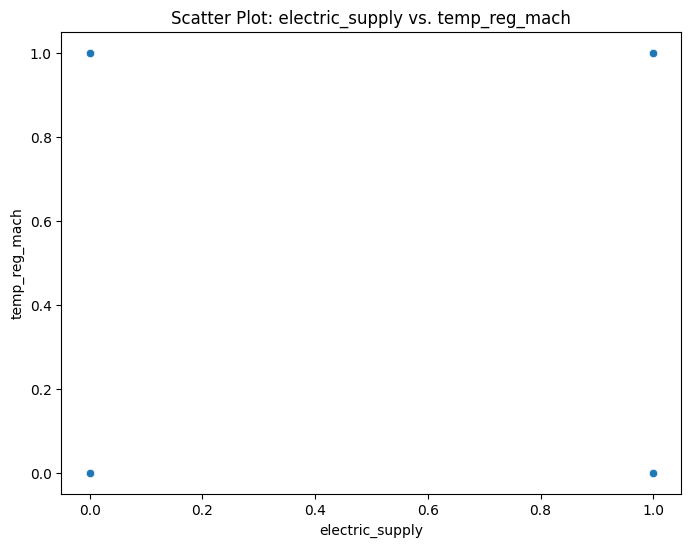

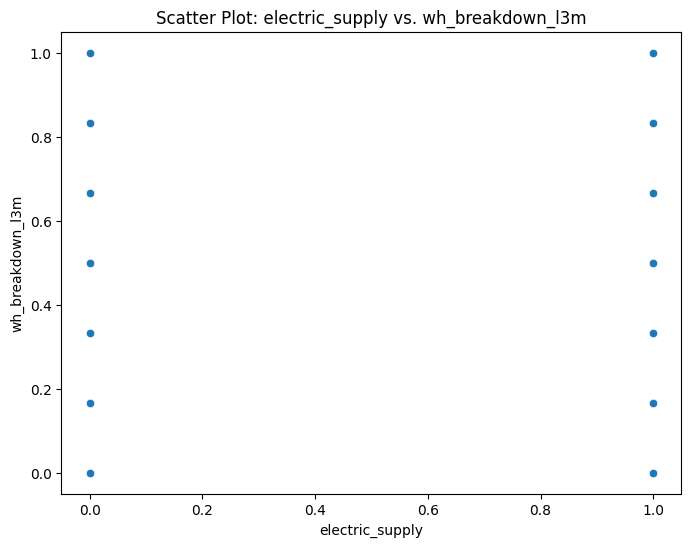

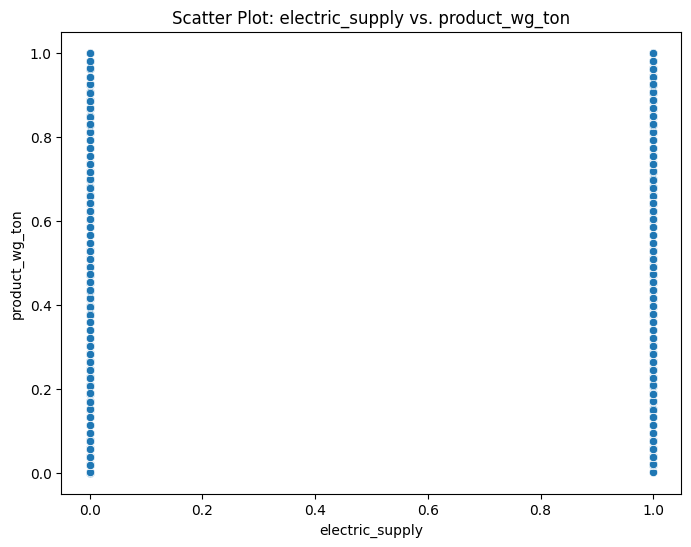

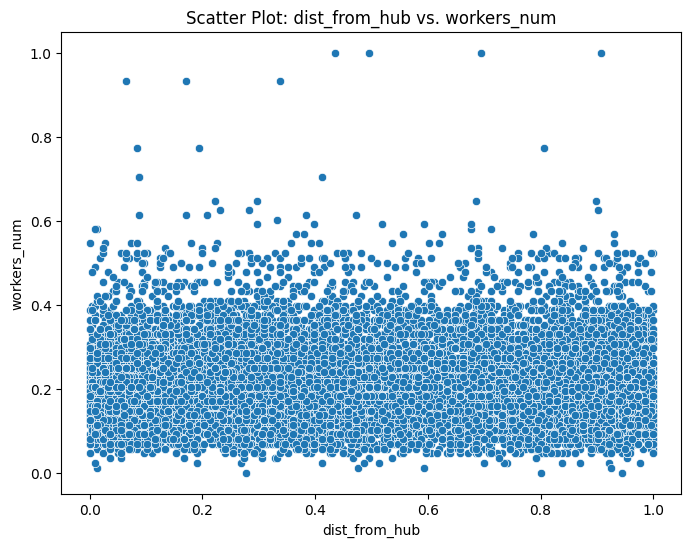

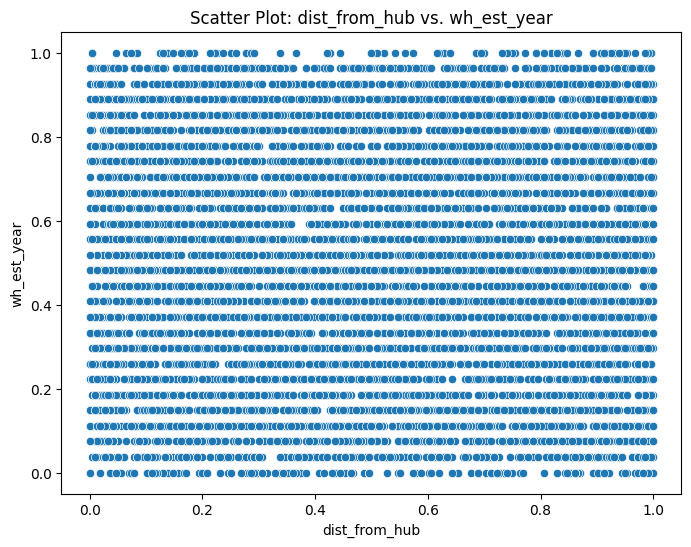

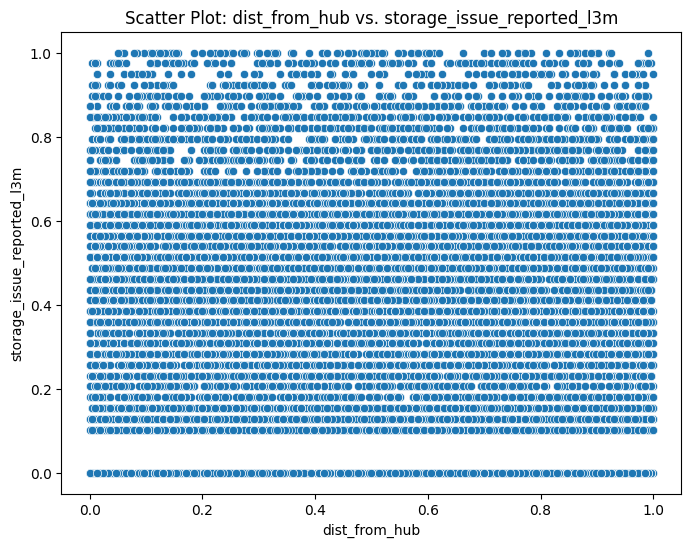

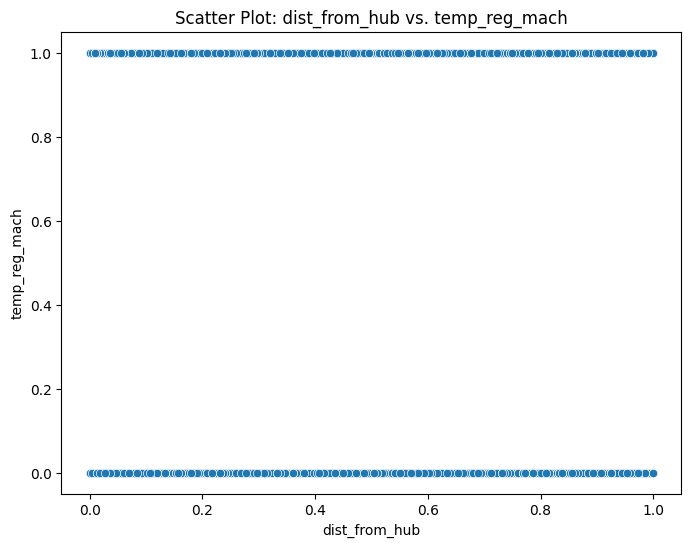

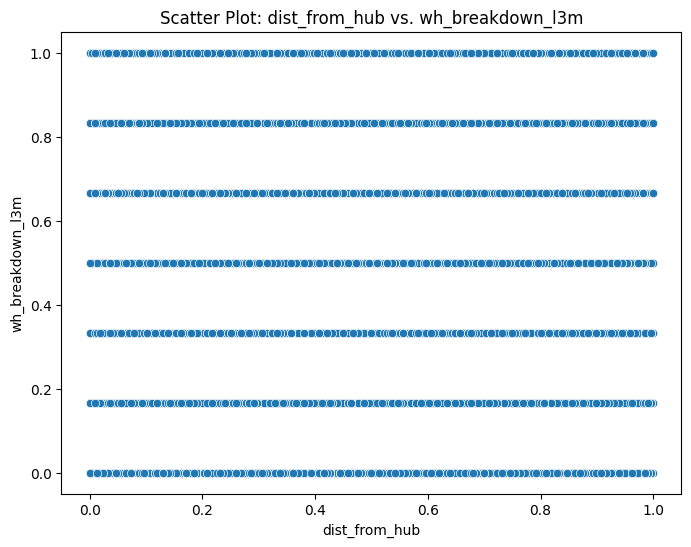

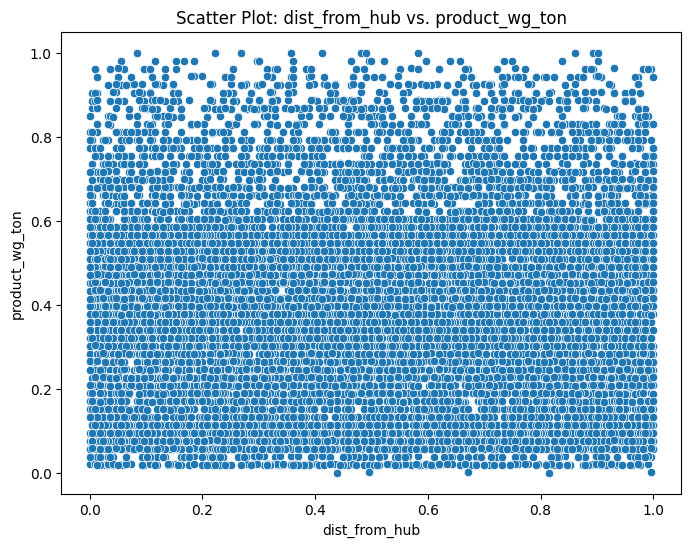

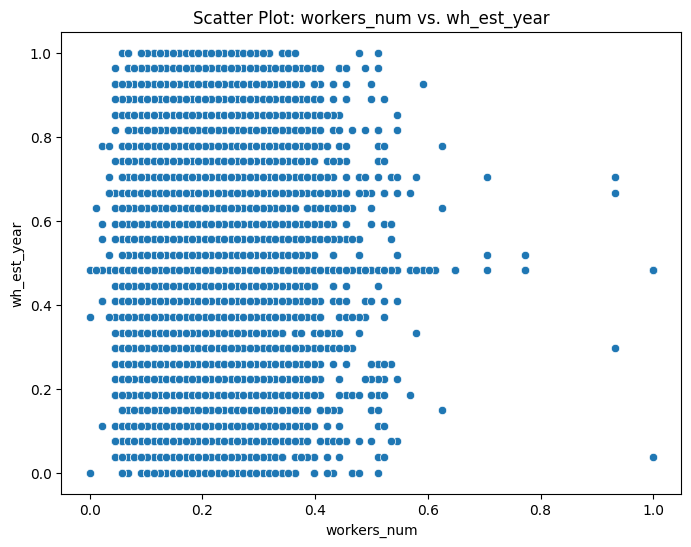

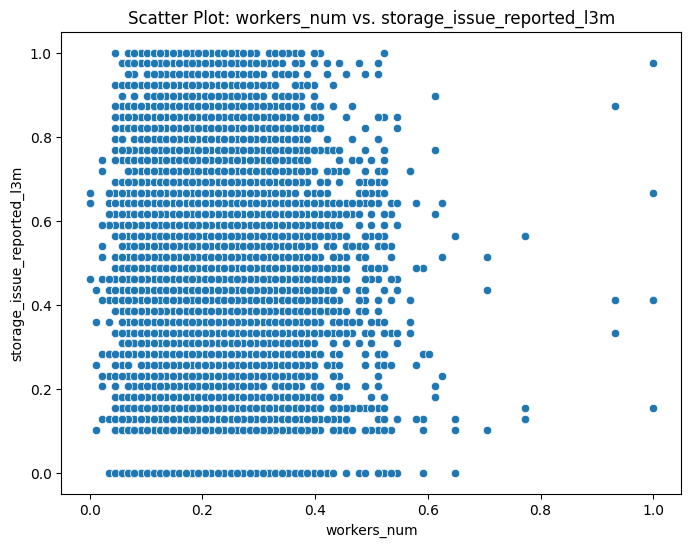

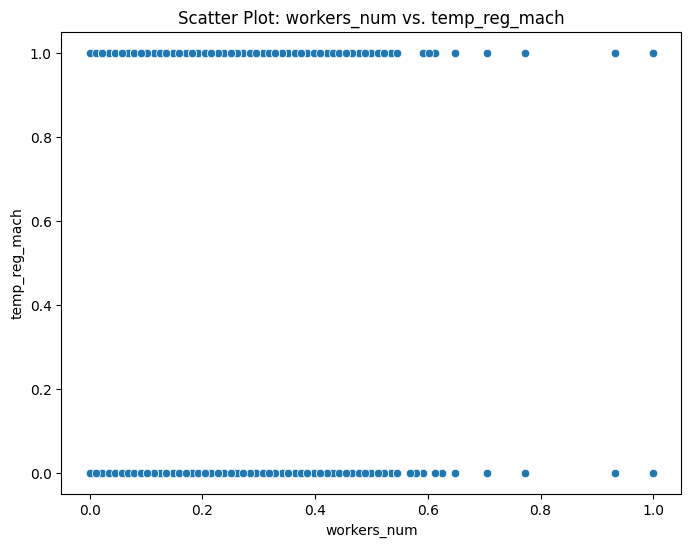

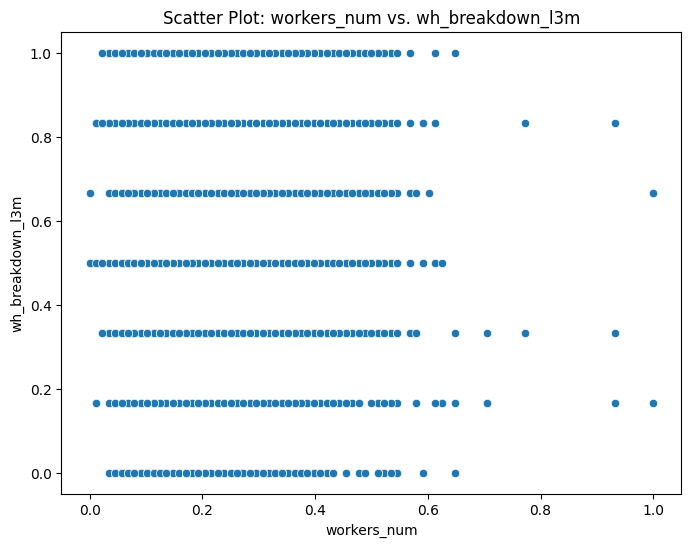

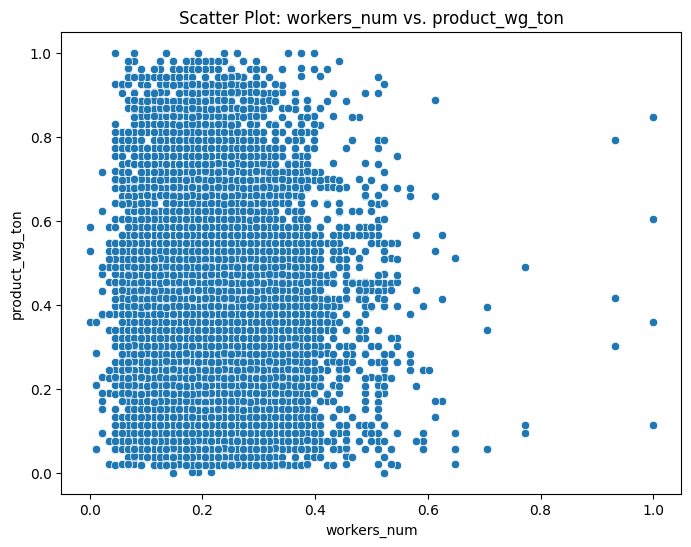

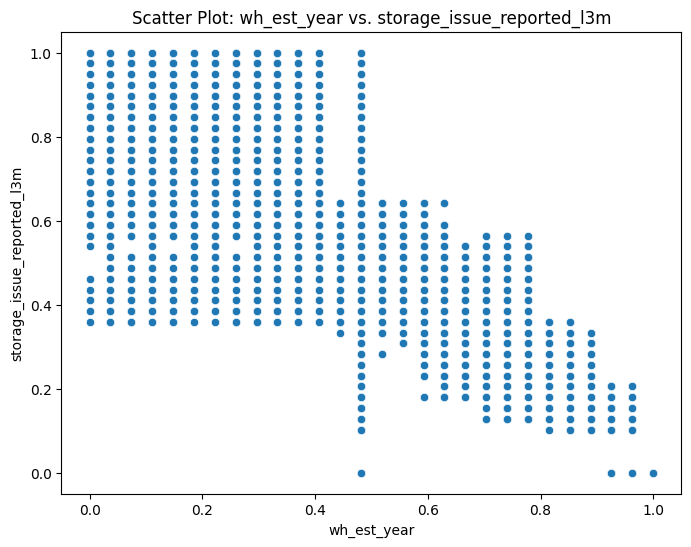

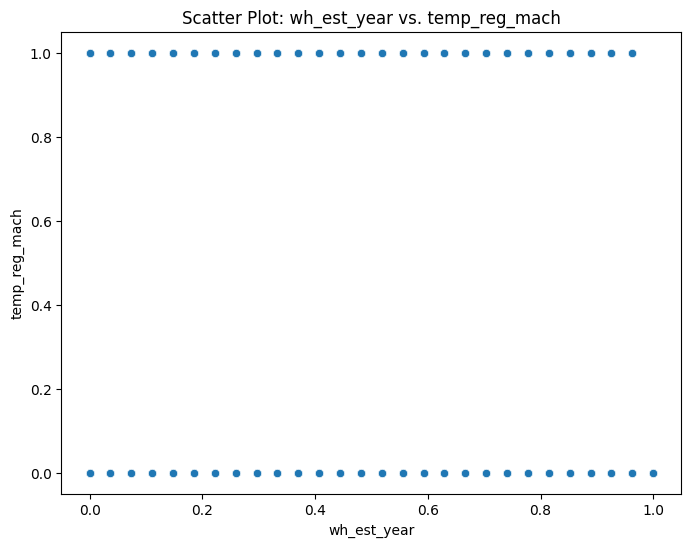

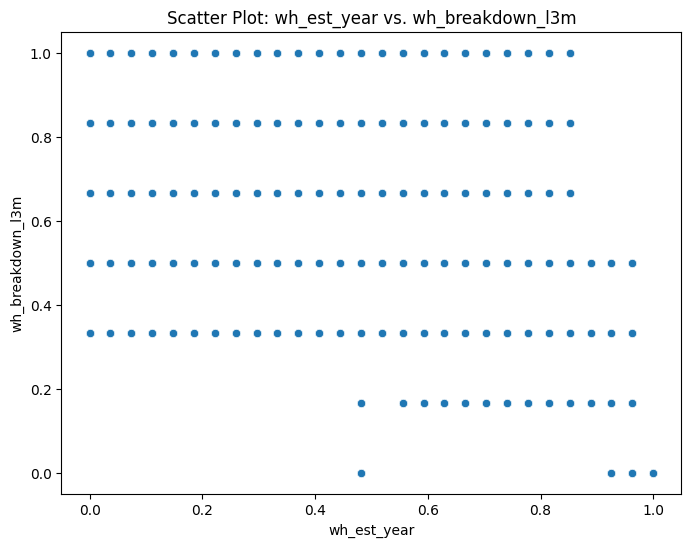

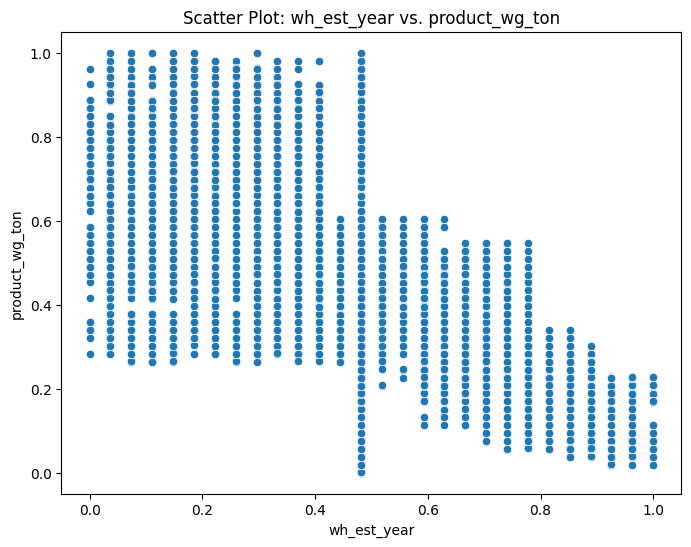

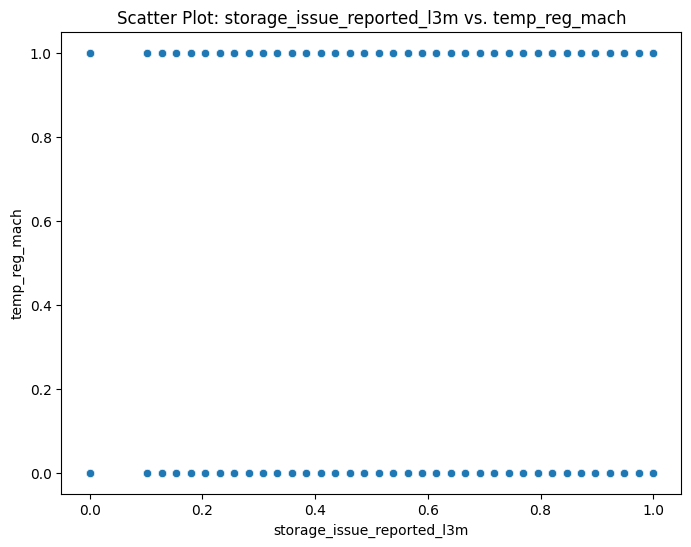

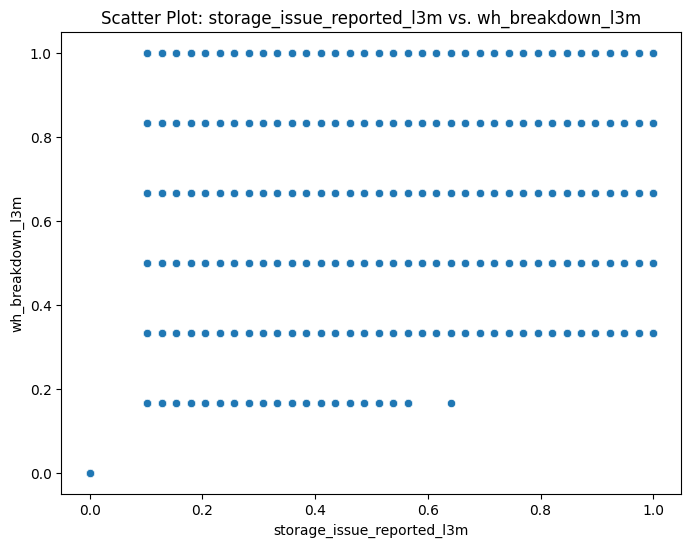

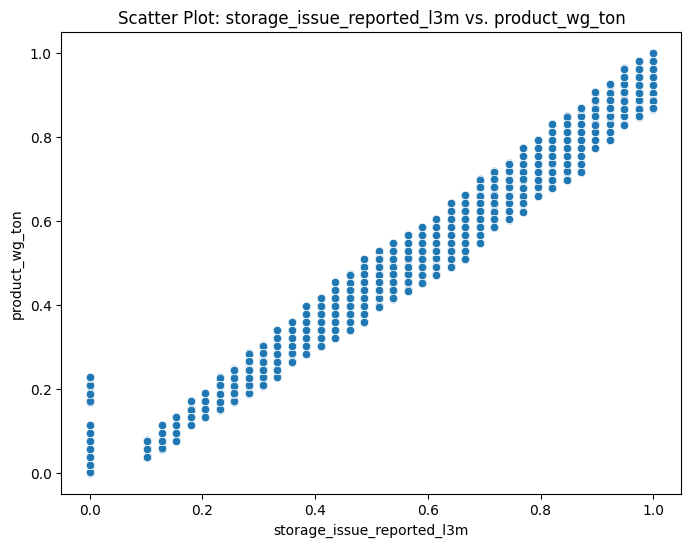

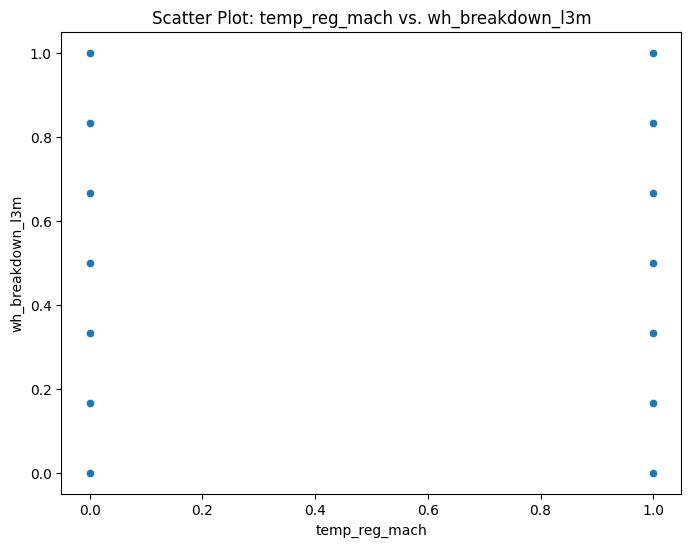

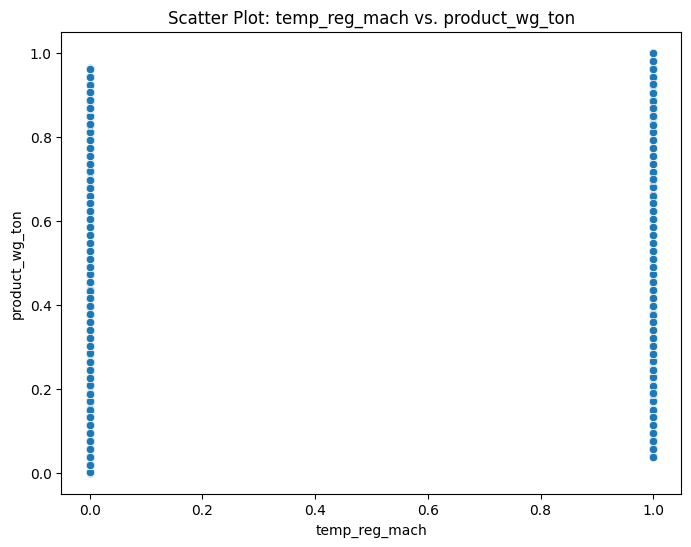

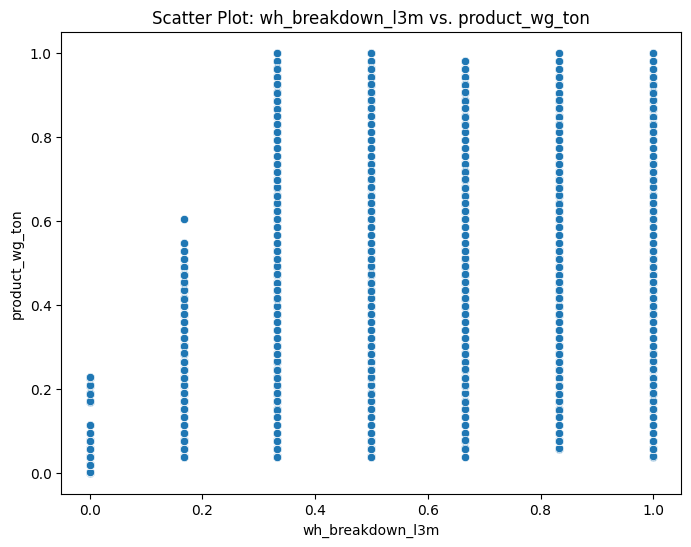

In [39]:
import matplotlib.pyplot as plt

# Define the numerical columns for which you want to create scatter plots
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
                     'flood_impacted']

import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical columns for which you want to create scatter plots
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
                     'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
                     'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']

# Create scatter plots for pairs of numerical variables
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], data=train_data)
        plt.title(f'Scatter Plot: {numerical_columns[i]} vs. {numerical_columns[j]}')
        plt.show()

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Count Plots<b>
</div>

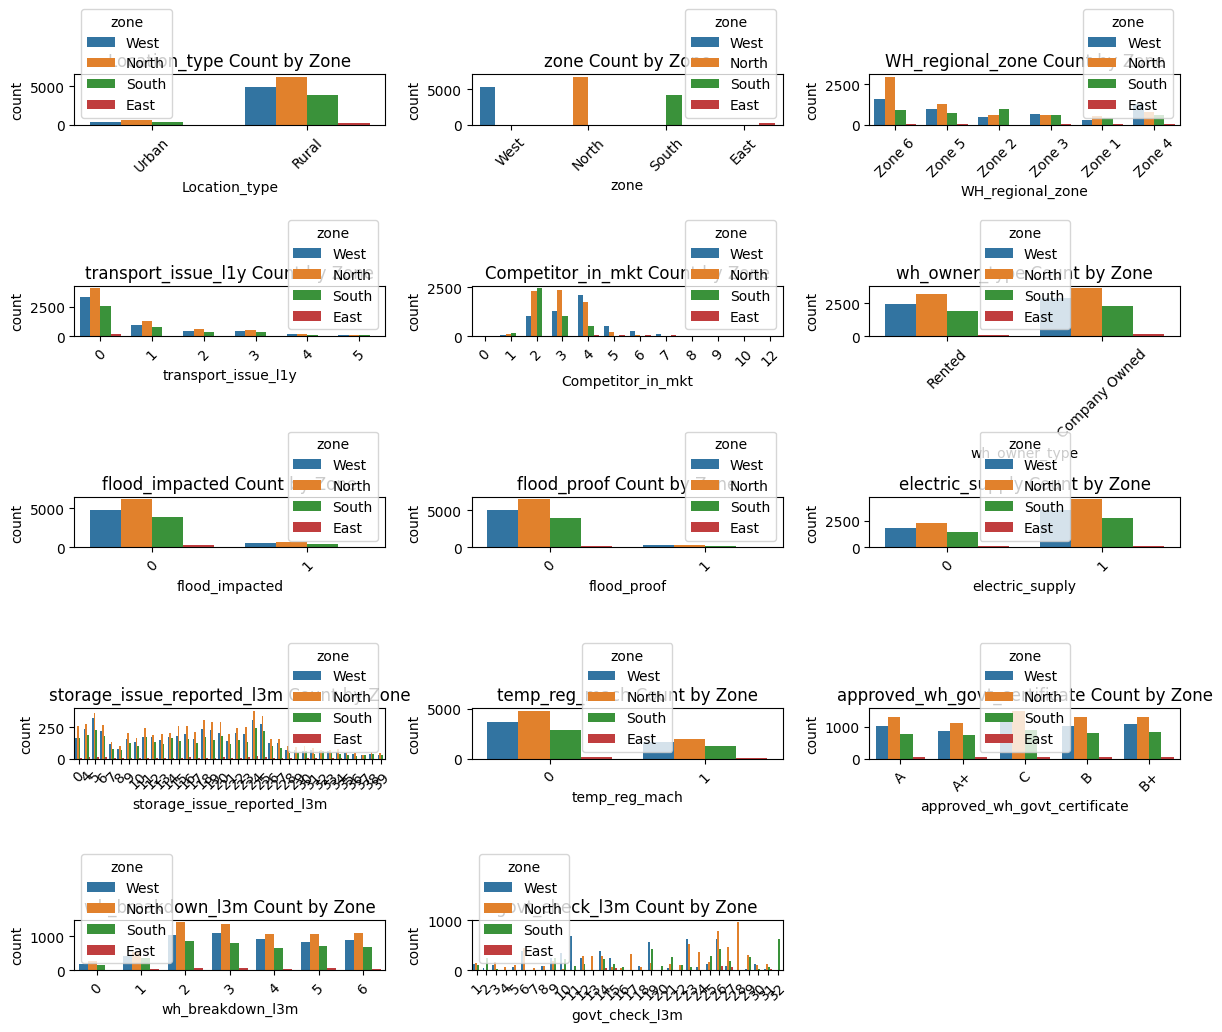

In [40]:
# Count Plots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=data, x=feature, hue='zone')
    plt.xticks(rotation=45)
    plt.title(f'{feature} Count by Zone')

plt.tight_layout()
plt.show()

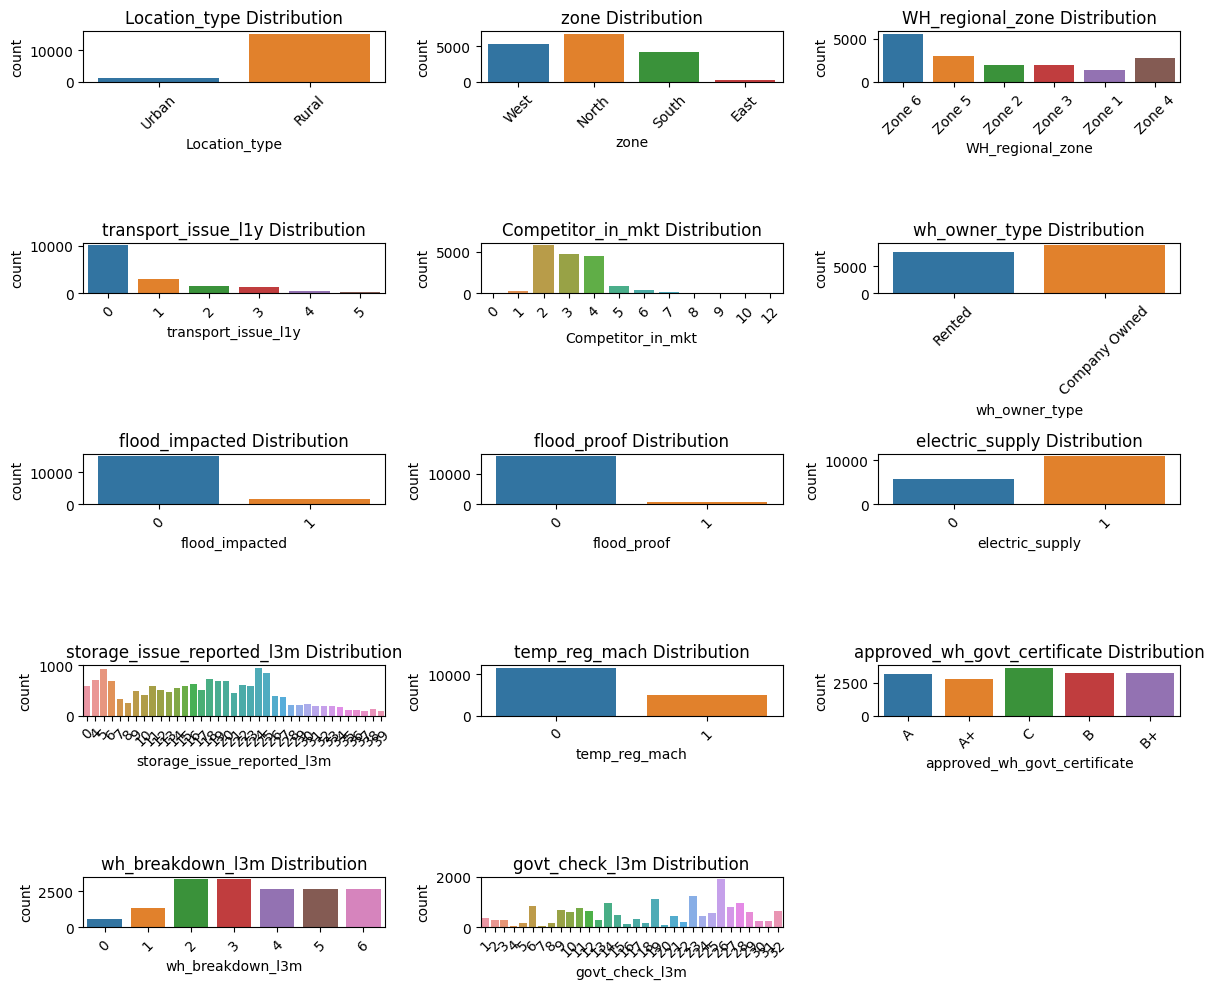

In [41]:

# Categorical Features Distribution
categorical_features = ['Location_type', 'zone', 'WH_regional_zone', 'transport_issue_l1y',
                        'Competitor_in_mkt', 'wh_owner_type', 'flood_impacted', 'flood_proof',
                        'electric_supply', 'storage_issue_reported_l3m', 'temp_reg_mach',
                        'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=data, x=feature)
    plt.xticks(rotation=45)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Correlation Matrix<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 18px; ">
A correlation matrix shows the relationships between numerical variables. We can create a heatmap to visualize the correlation:
</div>


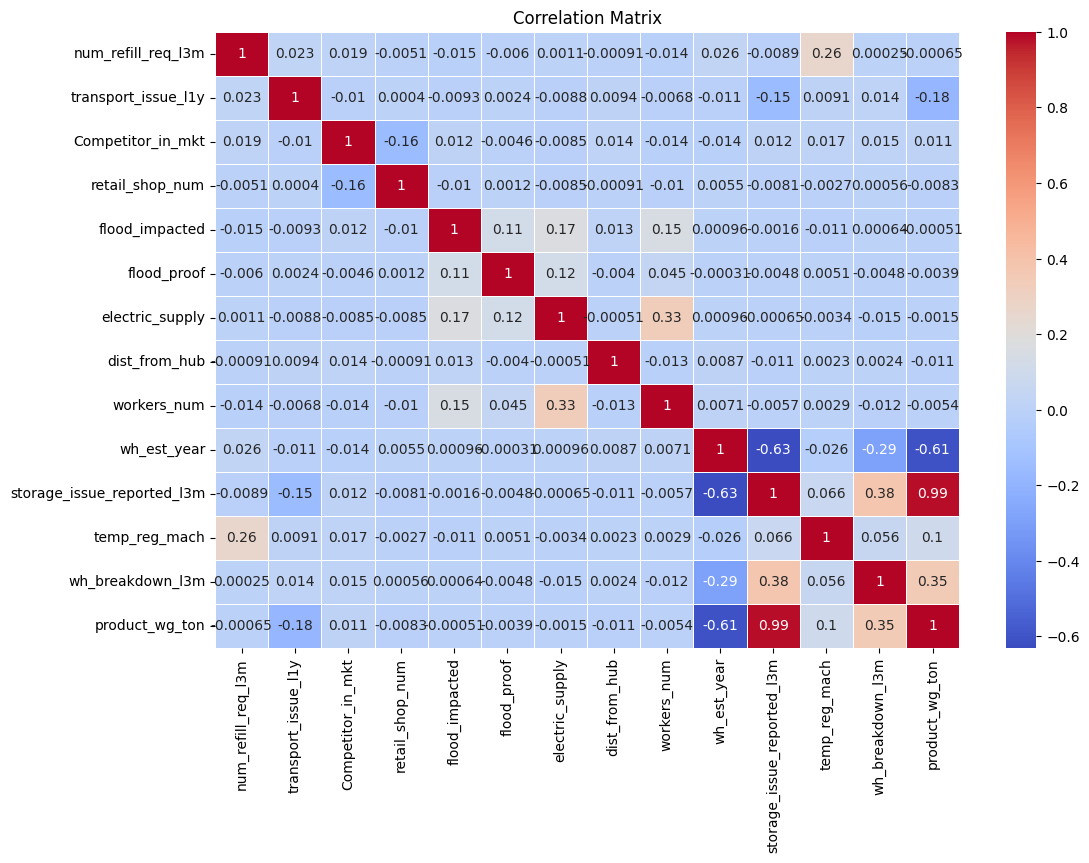

In [42]:
# Calculate the correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<div style="text-align:Left; color:blue; font-size:25px; line-height: 1.2;font-family: 'CustomFont'"><b>
   Model Selection and Training
    </b></div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
Five machine learning algorithms were selected for model training:
 </div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Define Features and Target Variable<b>
</div>

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [44]:
# Define the features and target variable
features = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
            'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
            'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 
            'product_wg_ton']  # Update with the selected features

X = train_data[features]
y = train_data['product_wg_ton']


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Model Selection (Five Models)<b>
</div>

<div style="font-family: 'CustomFont'; font-size: 20px;line-height:1.5 ">
    
    1. Decision Tree Regressor 
    2. Random Forest Regressor
    3. Support Vector Regressor 
    4. Gradient Boosting Regressor 
    5. Neural Network Regressor
</div>

In [45]:
# Initialize regression models
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Neural Network Regressor": MLPRegressor(random_state=42)
}


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Model Evaluation (MSE, MAE, R^2)<b>
</div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
These models were trained on the training dataset, and their performance was evaluated using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2).

 </div>

In [46]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results[model_name] = {"MSE": mse, "MAE": mae, "R^2": r2}


In [47]:
# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MSE: {metrics['MSE']:.12f}")
    print(f"MAE: {metrics['MAE']:.12f}")
    print(f"R^2: {metrics['R^2']:.12f}")
    print("="*30)


Model: Decision Tree Regressor
MSE: 0.000000000453
MAE: 0.000006526246
R^2: 0.999999990600
Model: Random Forest Regressor
MSE: 0.000000000359
MAE: 0.000005397166
R^2: 0.999999992559
Model: Support Vector Regressor
MSE: 0.001441278877
MAE: 0.030186100584
R^2: 0.970120882907
Model: Gradient Boosting Regressor
MSE: 0.000000066717
MAE: 0.000182867999
R^2: 0.999998616884
Model: Neural Network Regressor
MSE: 0.000242105005
MAE: 0.012019794640
R^2: 0.994980927073


<div style="text-align:Left; color:blue; font-size:25px; line-height: 1.2;font-family: 'CustomFont'"><b>
    Model Interpretation
    </b></div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
The Random Forest Regressor was identified as the best-performing model, and its feature importances were analyzed. A plot of actual vs. predicted product weight was created to visually assess model performance.
 </div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Feature Importance Analysis<b>
</div>


In [48]:
# Load the trained Random Forest model
import joblib

# Replace 'C:\\Users\\user\\random_forest_regressor_model.pkl' with the correct file path
loaded_model = joblib.load('C:\\Users\\user\\random_forest_regressor_model.pkl')

# Get feature importances from the loaded model
feature_importances = loaded_model.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Get the feature names
feature_names = X.columns


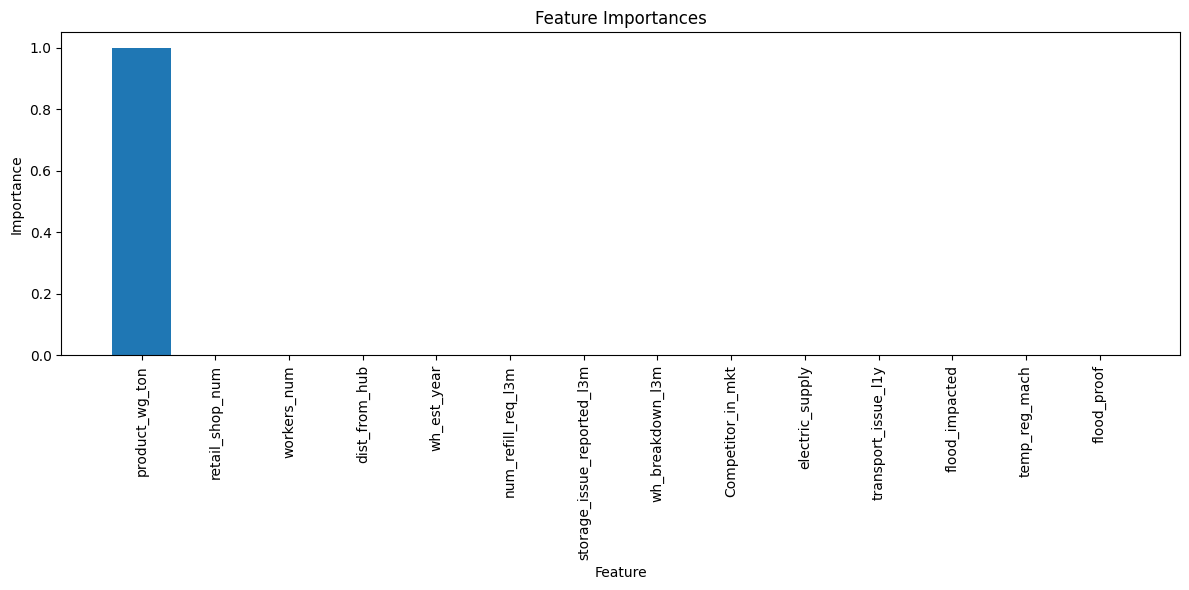

In [49]:

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Actual vs. Predicted Product Weight Plot<b>
</div>


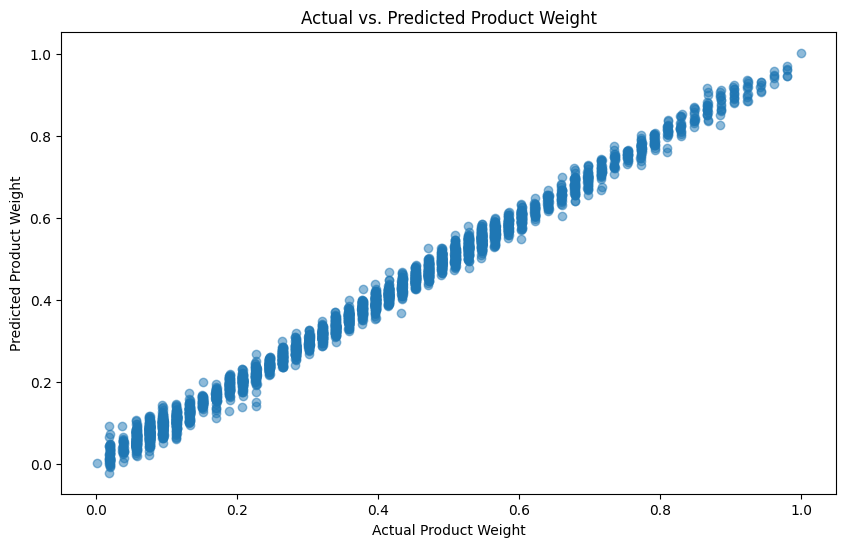

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Actual vs. Predicted Product Weight")
plt.show()


<div style="text-align:Left; color:blue; font-size:25px; line-height: 1.2;font-family: 'CustomFont'"><b>
    Next Steps and Improvements
    </b></div>


<div style="font-family: 'CustomFont'; font-size: 20px; line-height: 1.2">
Several next steps and improvements were suggested for further enhancing the project:
   </div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Hyperparameter Tuning<b>
</div>


In [51]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with your chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)


<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Select the Best Model (Random Forest Regressor)<b>
</div>


In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor (you can replace this with your tuned model)
random_forest_regressor = RandomForestRegressor(random_state=42)

# Train the model on the entire training dataset (combining training and validation sets)
random_forest_regressor.fit(X, y)


RandomForestRegressor(random_state=42)

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Save the Trained Model<b>
</div>


In [53]:
import joblib

# Save the trained model to a file
joblib.dump(random_forest_regressor, 'random_forest_model.pkl')


['random_forest_model.pkl']

<div style="text-align:Left; color:blue; font-size:25px; line-height: 1.2;font-family: 'CustomFont'"><b>
    Conclusion
    </b></div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
In conclusion, this data science project successfully addressed the supply chain optimization challenge for the FMCG company. A Random Forest Regressor model was developed to predict the optimum product weight for shipments. The project provided valuable insights into supply chain dynamics and identified areas for improvement. Implementing the recommended next steps can lead to further enhancements and cost savings for the company.
 </div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Key Findings<b>
</div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">
Here are some potential key findings that could be derived from the project:


1. **Supply Chain Optimization Impact:** 
    <br>The predictive model, specifically the Random Forest Regressor, has demonstrated its effectiveness in optimizing product weight shipments. This optimization has the potential to significantly reduce inventory costs and improve overall profitability for the FMCG company.

2. **Feature Importance:**
    <br>Among the analyzed features, "num_refill_req_l3m" and "retail_shop_num" have been identified as the most influential factors affecting product weight shipments. These variables play a crucial role in supply chain dynamics, and understanding and managing them can lead to better decision-making.

3. **Data Insights from EDA:**
    <br>Exploratory Data Analysis (EDA) has provided valuable insights into the relationships between various variables and product weight. For instance, the presence of competitors in the market and the number of retail shops have shown strong correlations with product weight. These insights can inform supply chain strategies.

4. **Model Performance:** 
    <br>The Random Forest Regressor emerged as the best-performing model among the five machine learning algorithms tested. It achieved the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE) and the highest R-squared (R^2) score on the validation dataset, indicating its accuracy in predicting product weights.

5. **Feature Importance Analysis:**
    <br>Feature importance analysis of the Random Forest Regressor model revealed that certain variables, such as "num_refill_req_l3m," "retail_shop_num," and "dist_from_hub," have the most significant impact on product weight predictions. These features should be closely monitored and managed for supply chain optimization.

6. **Actual vs. Predicted Product Weight:**
    <br>A scatter plot comparing actual product weights to predicted product weights using the Random Forest Regressor model shows a strong positive linear relationship. This indicates that the model provides reliable predictions that align with the actual data.

7. **Recommendation for Model Deployment:** 
    <br>The Random Forest Regressor model should be considered for deployment in the company's supply chain operations. Its accuracy and effectiveness in optimizing product weight shipments make it a valuable tool for decision support.

These key findings summarize the main insights and outcomes of the data science project. They highlight the importance of the predictive model, the significance of specific features, and the potential for improving supply chain efficiency and profitability.</div>

<div style="font-family: 'CustomFont'; font-size: 20px; ">
    
<b>Recommendations<b>
</div>


<div style="font-family: 'CustomFont'; font-size: 20px; ">

Here are some potential recommendations that could be made based on the key findings of the supply chain optimization project:

**Recommendations:**

1. **Deploy the Random Forest Regressor Model:**
    <br>Given its superior performance in optimizing product weight shipments, it is recommended to deploy the Random Forest Regressor model into the company's supply chain management system. This will enable real-time decision-making and automatic adjustments in product weight allocations to minimize inventory costs.

2. **Monitor and Manage Key Features:**
    <br>Pay close attention to the key features identified in the model's feature importance analysis, including "num_refill_req_l3m," "retail_shop_num," and "dist_from_hub." These variables have a significant impact on product weight predictions. Monitoring and managing these factors can lead to more efficient supply chain operations.

3. **Advanced Data Imputation:** 
    <br>Explore advanced data imputation techniques for handling missing values in the dataset. Techniques such as k-Nearest Neighbors (k-NN) imputation or predictive modeling-based imputation may provide more accurate and meaningful data for modeling.

4. **Hyperparameter Tuning:**
    <br>Fine-tune the hyperparameters of the Random Forest Regressor model to further improve its predictive accuracy. Grid search or random search techniques can help identify optimal hyperparameter settings.

5. **External Data Integration:** 
    <br>Consider integrating external data sources, such as weather data, economic indicators, or competitor information, into the modeling process. External data can provide additional insights and enhance the model's accuracy.

6. **Continuous Model Monitoring:**
    <br>Implement a system for continuous model monitoring and maintenance. Regularly update the model with new data and retrain it to ensure it remains effective over time. This step is crucial for long-term success in supply chain optimization.

7. **Presentation and Training:** 
    <br>Prepare a formal presentation to share the project's methodology, key findings, and recommendations with higher management and relevant stakeholders. Additionally, provide training to supply chain personnel on how to use the deployed model effectively in their decision-making processes.

8. **Evaluate Cost Savings:**
    <br>Conduct a cost-benefit analysis to quantify the potential cost savings and profitability improvements resulting from the deployment of the predictive model. This analysis can help justify the investment in model implementation.

9. **Pilot Implementation:** 
    <br>Consider conducting a pilot implementation of the model in a specific region or distribution center before full-scale deployment. This allows for testing and refinement of the model in a controlled environment.

10. **Feedback Loop:** 
    <br>Establish a feedback loop for supply chain professionals to provide input and feedback on the model's recommendations. Continuous communication and collaboration are essential for fine-tuning the model's performance based on real-world experiences.

These recommendations aim to guide the FMCG company in leveraging the insights gained from the project to optimize its supply chain operations effectively. Implementation of these recommendations can lead to cost savings, improved profitability, and more efficient inventory management.
</div>